# Wprowadzenie
## Cel
Celem jest analiza najpopularniejszych utworów muzycznych w ujeciu czasowym oraz znalezienie potencjlanych wpływów na zmiany. Istotny wpływ na branże muzyczną ma medium które dominuje w danych latach, poddamy analizie również czy ma to wpływ na muzykę. <br>
W tym celu zostaną przeanalizowane dane dotyczące notowań listy Hot 100 Billboard od 1958 roku do 2021 roku. Hot 100 Billboard to lista najpopularniejszych utworów (wyliczany na podstawie radia, streamingów oraz sprzedanych płyt)w US<br>
### Sposoby słuchania muzyki w przeciągu lat
* 1958 - 1963 - radio, płyty winylowe
* 1964 - 1979 - radio, płyty winylowe, kasety
* 1980 - 1999 - radio, płyty winylowe, kasety, CD
* 2000 - 2010 - radio, płyty winylowe, kasety, CD, MP3
* 2011 - 2021 - radio, płyty winylowe, kasety, CD, MP3, streaming
### Dostępność mediów dla ludzi
streaming > mp3 > radio > cd > kasety > płyty winylowe
### Charakterystyki niektórych mediów
* streaming - artysta ma płacone za każdą odsłuchaną piosenkę tylko wtedy gdy użytkownik przesłucha powyżej 30 sekund
* radio - średnio puszczanę są krótsze piosenki oraz bardziej energiczne aby przyciągnąć słuchaczy
* płyty winylowe - długość piosenek jest ograniczona do 20 minut
* mp3 - era mp3 to era nielegalnego pobierania muzyki z internetu i kopiowania
* kasety - kopiowanie muzyki na kasety było bardzo proste i powszechne
## Dane
Został on podzielony na cztery zestawy: 
* `charts.csv` - zawiera dane dotyczące notowań wszystkich piosenek, które znalazły się na liście Hot 100 Billboard. Pochodzą one z [Kaggle](https://www.kaggle.com/dhruvildave/billboard-the-hot-100-songs) zebrane przez Dhruvil Dave
* `charts_top_10.csv` - jest bardziej szczegółowym zestawieniem gdzie zostały uwzględnione tylko 10 pierwszych pozycji z ich cechami o samym utworze. Dane zostały pobrane z [Spotify API](https://developer.spotify.com/documentation/web-api) za pomocą skryptów dostępnych w folderze `data_extenders`.
* `songs.csv` - zawiera wszystkie piosenki z notowań z najlepszym rankingiem oraz liczbą tygodni na liście. Co ważne piosenki są unikalne, tzn. jeśli piosenka była na liście kilka razy to jest tylko jeden wpis z najwyższym rankingiem, największą liczbą tygodni na liście oraz ostatnim wystąpieniem na liście. 
* `songs_top_10.csv` - analogiczny plik do `songs.csv` tylko z uwzględnieniem tylko 10 pierwszych pozycji z ich cechami o samym utworze.
## Opis poszczególnych cech
- `date` - data notowania
- `rank` - pozycja na liście
- `title` - tytuł piosenki
- `artist` - wykonawca
- `last_week` - pozycja na liście w poprzednim tygodniu
- `peak_rank` - najwyższa pozycja na liście
- `weeks_on_chart` - liczba tygodni na liście
- `danceability` - określa jak łatwo jest tańczyć do utworu (wartosć od 0 do 1)
- `energy` - określa poziom energii w utworze (wartosć od 0 do 1)
- `acousticness` - pewność czy utwór jest akustyczny (wartosć od 0 do 1)
- `instrumentalness` - przewiduje czy utwór nie zawiera wokalu (wartosć od 0 do 1). Wartości powyżej 0.5 są uznawane za instrumentalne, ale wartości powyżej 0.9 wskazują na bardzo wysoki poziom pewności.
- `speechiness` - wykrywa obecność słów mówionych w utworze (wartosć od 0 do 1). Wartosc powyżej 0,66 opisuje ścieżki wyłacznie z mówionymi słowami. Wartości między 0,33 a 0,66 opisują utwory zawierające zarówno muzykę, jak i mowę.
- `duraton_ms` - długość utworu w milisekundach
<br> Więcej informacji na temat cech można znaleźć w [dokumentacji Spotify API](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)
### Wczytywanie danych

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

base = pd.read_csv('data_sets/charts.csv')
extended = pd.read_csv('data_sets/charts_top_10.csv')
songs = pd.read_csv('data_sets/songs.csv')
extended_songs = pd.read_csv('data_sets/songs_top_10.csv')

# Analiza eksploracyjna `songs.csv`
##### Wcztanie danych

In [212]:
songs = pd.read_csv('data_sets/songs.csv')
songs.columns = ['artysci', 'tytuly', 'data', 'najwyzsza-pozycja', 'liczba-tygodni-w-notowaniu']
songs.head()

,artysci,tytuly,data,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
0,"""Groove"" Holmes",Misty,1966-09-03,44,11
1,"""Groove"" Holmes",What Now My Love,1966-10-15,96,3
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,1965-12-18,15,10
3,"""Pookie"" Hudson",I Know I Know,1963-05-25,96,1
4,"""Weird Al"" Yankovic",Amish Paradise,1996-07-13,53,16


## Statystyki Opisowe

W całym zestawieniu znajduje się 29 681 utworów unikalnych. 
### Najwyższa pozycja w rankingu
Średnia wartosć dla najwyższej pozycji to 46 czyli mniej więcej w połowie rankingu. Tak samo sytacja ma się z medianą która jest zbliżona do średniej co potwierdza symetrycznośc danych.
### Liczba tygodni w notowaniu
Średnia liczba tygodni w notowaniu to 11. Tak samo sytacja ma się z medianą która jest zbliżona do średniej co potwierdza symetrycznośc danych. Maksymalna liczba tygodni w rankingu to 90.

In [213]:
songs.describe().drop(['min'])

,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
count,29681.00000,29681.000000
mean,46.70594,11.124928
std,30.54190,8.309679
25%,18.00000,5.000000
50%,46.00000,10.000000
75%,73.00000,16.000000
max,100.00000,90.000000


### Najczęściej występujący utwór w rankingu

In [214]:
songs[songs['liczba-tygodni-w-notowaniu'] == songs['liczba-tygodni-w-notowaniu'].max()]

,artysci,tytuly,data,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
27367,The Weeknd,Blinding Lights,2021-09-04,1,90


## Szeregi rozdzielcze
### Analizy pozycji na liście
Z szeregu rozdzielczego wynika że najczęściej utwory znajdują się 1-5 bo aż 10% utworów. Pozostałe miejsca są tak samo często prawdopodbne około 5%.
### Analiza liczby tygodni w notowaniu
Czym więcej tygodni tym mniej utworów utrzymuje się w rankingu. Najczęściej utwory utrzymują się 1-5 tygodni bo aż 8621 czyli prawie 30% utworów. Następnie kolejne 20% utworów zostaje na liście przez 10 tygodni. Wraz z wzrostem tygodni prawdopodobieńśtwo maleje. Jest to logiczne dla tego typu cechy. 

In [215]:
header_names = songs.columns[3:]
for i in header_names:
    frequency = songs[i].value_counts(bins=20).sort_index().to_frame()
    frequency.columns = ['liczba-utworow']
    frequency['prawdopodobienstwo'] = frequency['liczba-utworow'] / frequency['liczba-utworow'].sum()
    display(frequency)

,liczba-utworow,prawdopodobienstwo
najwyzsza-pozycja,,
"(0.9, 5.95]",3030,0.102086
"(5.95, 10.9]",1980,0.066709
"(10.9, 15.85]",1606,0.054109
"(15.85, 20.8]",1401,0.047202
"(20.8, 25.75]",1348,0.045416
"(25.75, 30.7]",1349,0.045450
"(30.7, 35.65]",1289,0.043428
"(35.65, 40.6]",1313,0.044237
"(40.6, 45.55]",1327,0.044709


,liczba-utworow,prawdopodobienstwo
liczba-tygodni-w-notowaniu,,
"(0.91, 5.45]",8621,0.290455
"(5.45, 9.9]",6179,0.208180
"(9.9, 14.35]",5798,0.195344
"(14.35, 18.8]",3209,0.108116
"(18.8, 23.25]",4092,0.137866
"(23.25, 27.7]",784,0.026414
"(27.7, 32.15]",451,0.015195
"(32.15, 36.6]",179,0.006031
"(36.6, 41.05]",149,0.005020


## Histogramy

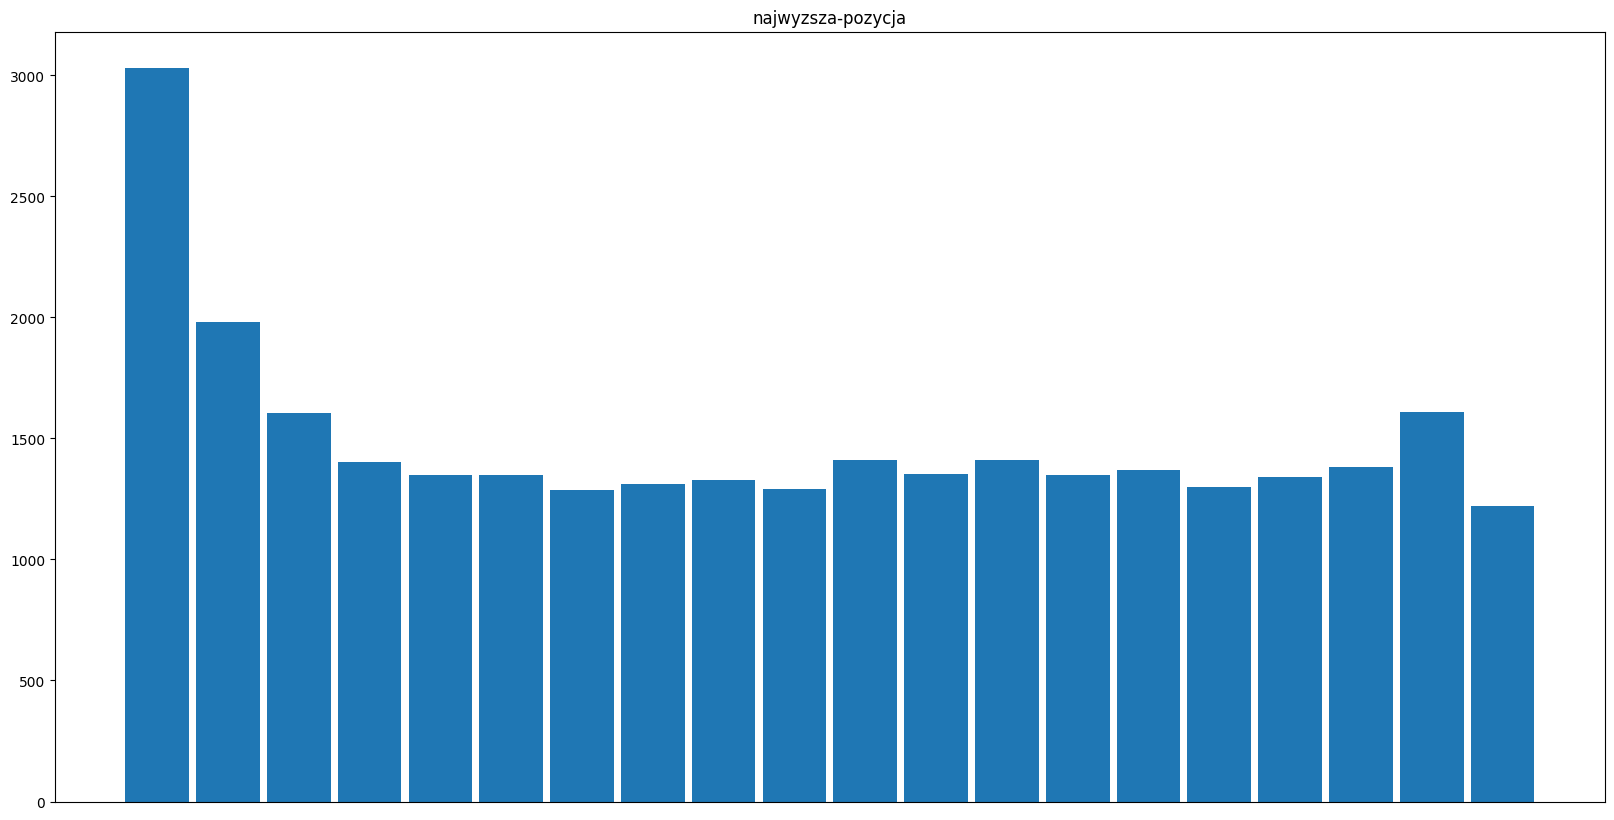

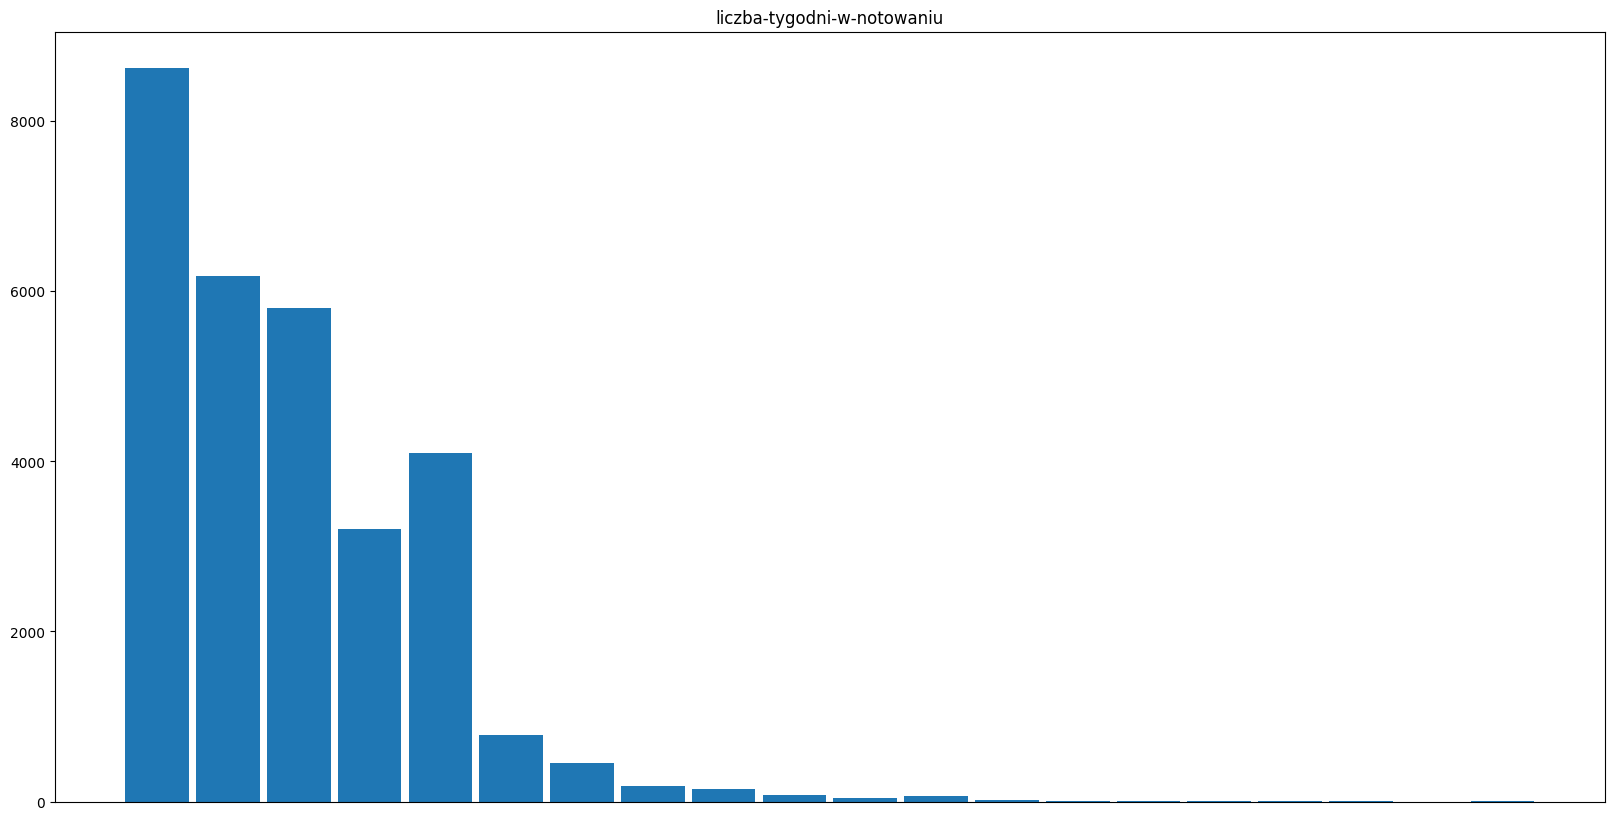

In [216]:
for i in header_names:
    frequency = songs[i].value_counts(bins=20).sort_index().to_frame()
    frequency.columns = ['liczba-utworow']
    plt.figure(figsize=(20, 10))    
    plt.bar(frequency.index.astype(str), frequency['liczba-utworow'], width=0.9, align='center')
    plt.xticks([])
    plt.title(i)
    plt.show()

## Zmiany w czasie
### Pozycja na liście
Na początku rankingu utwory średnio notowane były w połowie, na przełomie lat 70 te wartości spadły do około 40 procent jednak wraz z upływem czasu wartości te znowu wzrosły do około 50 procent.
### Liczba tygodni w notowaniu
Liczba tygodni w notowaniu wraz z czasem rośnie. Aż do lat 2000 gdzie następuje spadek. Może to być spowodowane tym że wraz z upływem czasu powstaje coraz więcej utworów i jest coraz więcej konkurencji.

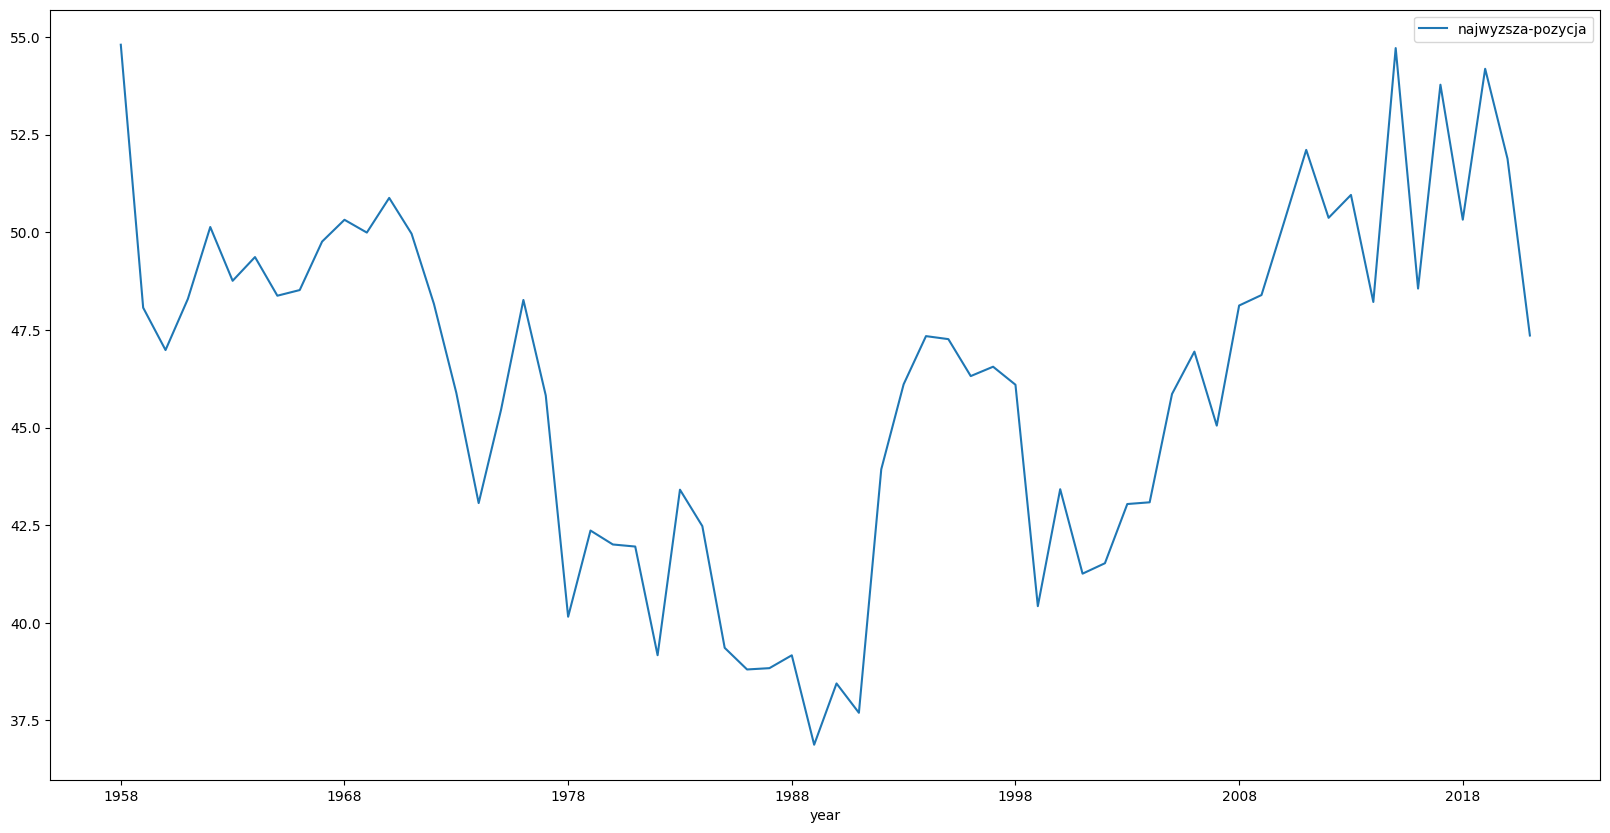

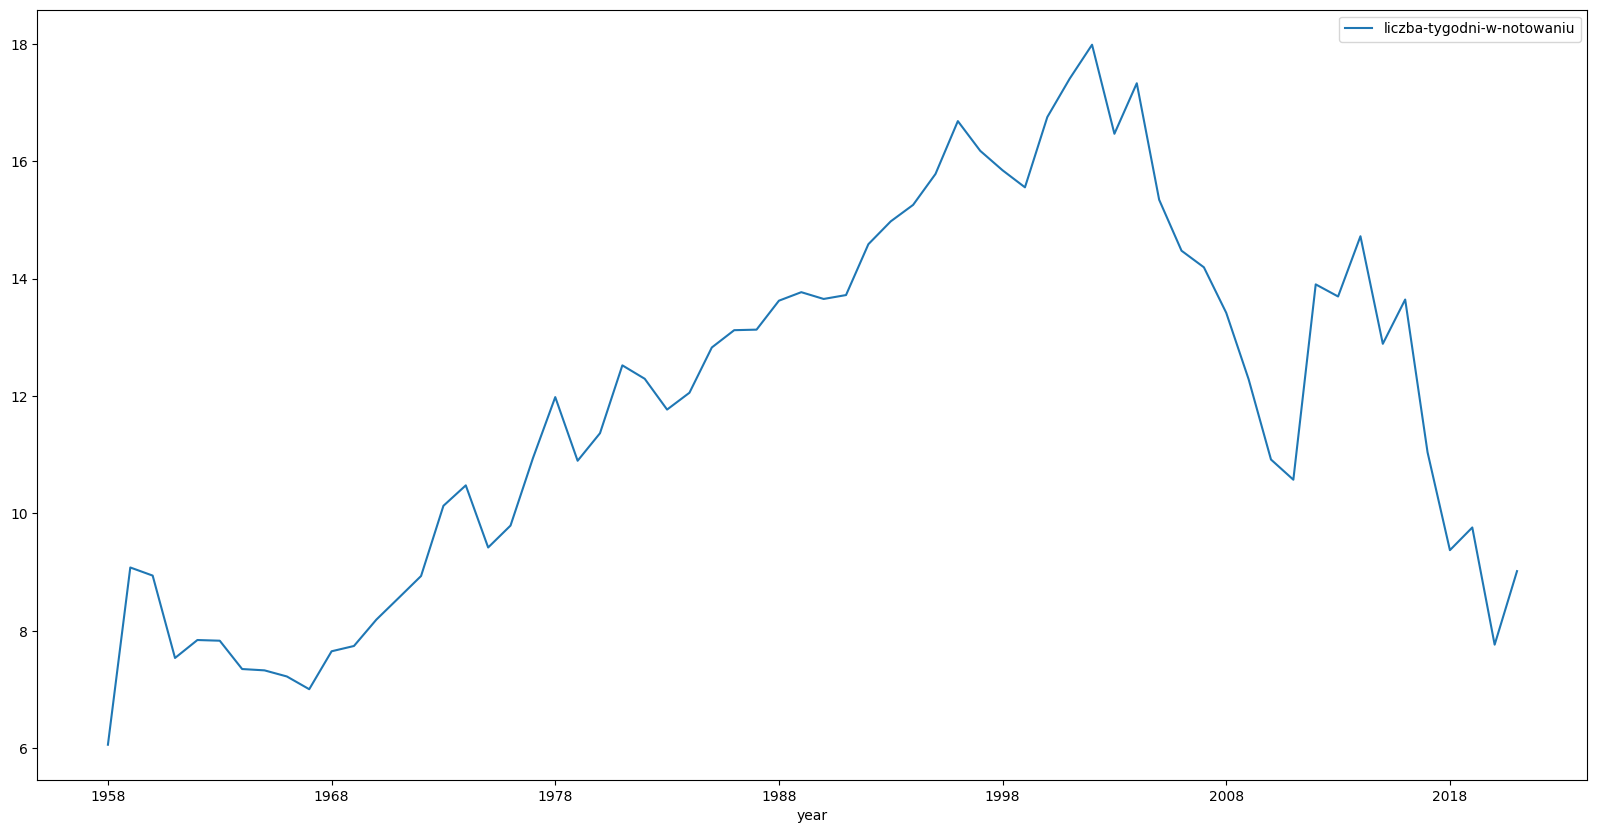

In [217]:
for i in header_names:
    songs['year'] = songs['data'].str[:4]
    year_means = songs.groupby('year').mean(i).drop(header_names.drop([i]), axis=1)
    year_means
    year_means.plot.line(figsize=(20, 10))


## Korelacja między zmiennymi
Można zaobserwować logiczną korelacje czym utwór wyżej w notowaniu tym więcej tygodni w notowaniu. Korelacja jest wysoka i wynosi -0.76 w korelacji spermana.

Korelacja Pearsona


,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
najwyzsza-pozycja,1.000000,-0.709731
liczba-tygodni-w-notowaniu,-0.709731,1.000000


Korelacja Spermana


,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
najwyzsza-pozycja,1.000000,-0.769456
liczba-tygodni-w-notowaniu,-0.769456,1.000000


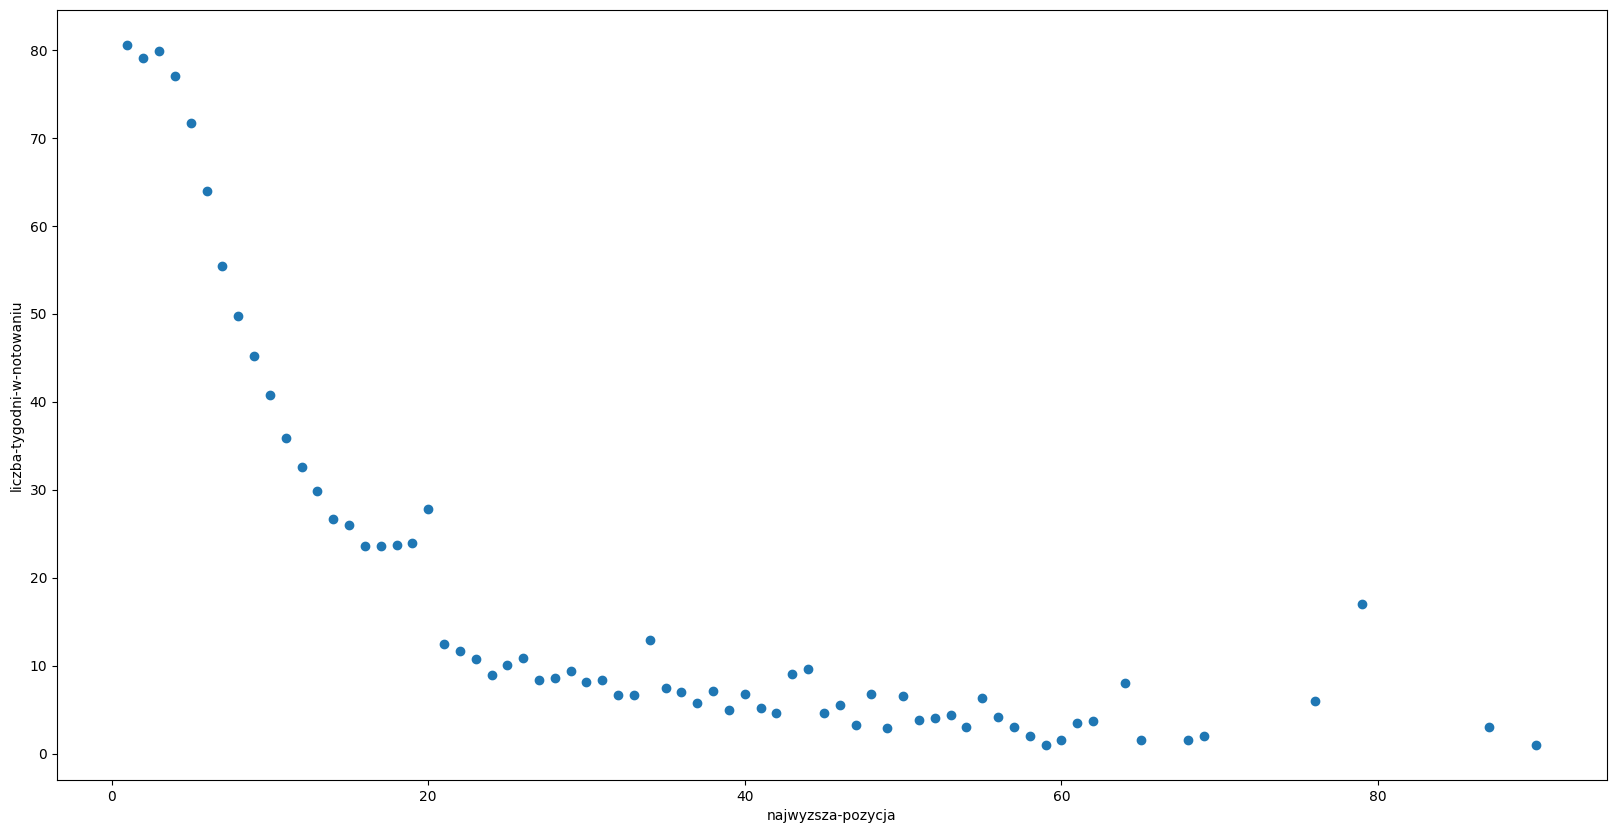

In [218]:
songs['data'] = pd.to_datetime(songs['data'])
print("Korelacja Pearsona")
display(songs.corr(method="pearson", numeric_only=True))
print("Korelacja Spermana")
display(songs.corr(method="spearman", numeric_only=True))
plt.figure(figsize=(20, 10))
tmp = songs.groupby('liczba-tygodni-w-notowaniu').mean('najwyzsza-pozycja')
plt.scatter(tmp.index, tmp['najwyzsza-pozycja'])
plt.xlabel('najwyzsza-pozycja')
plt.ylabel('liczba-tygodni-w-notowaniu')
plt.show()

## Zmiany w zależności od pojawienia się nowego medium
### Pozycja na liście
Pozycja na liście w zależności od pojawienia się nowego medium nie zmienia się.
### Liczba tygodni w notowaniu
Liczba tygodni w notowaniu w zależności od pojawienia się nowego medium zaczyna rosnąć gdy pojawia się cd. Jednak po pojawieniu się serwisów streamingowych maleje.

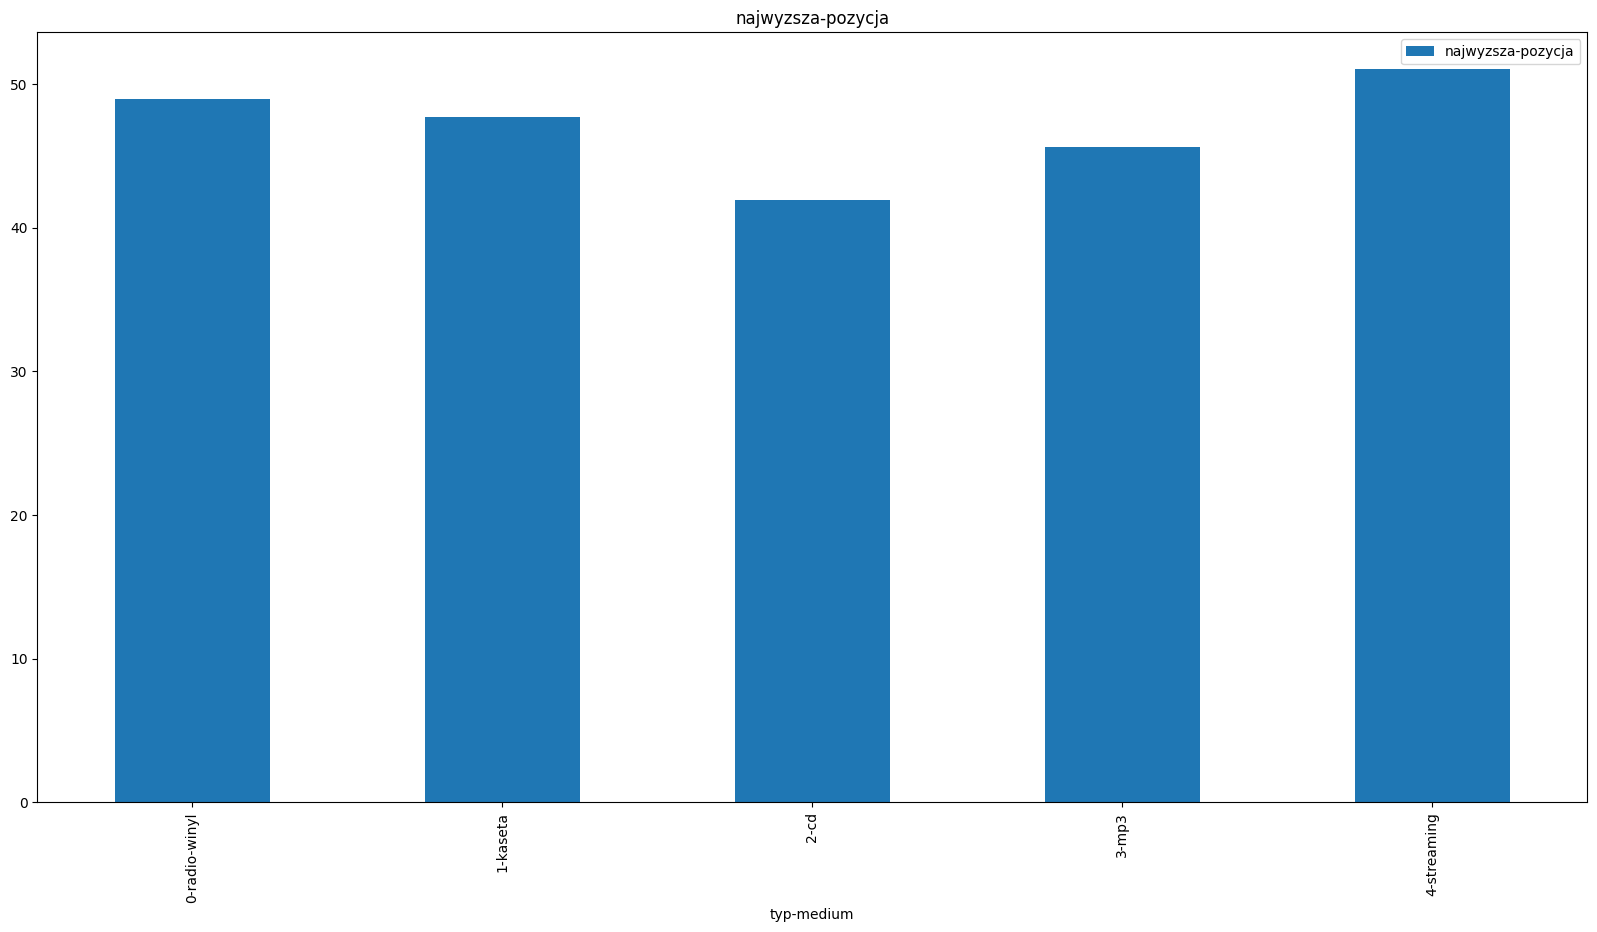

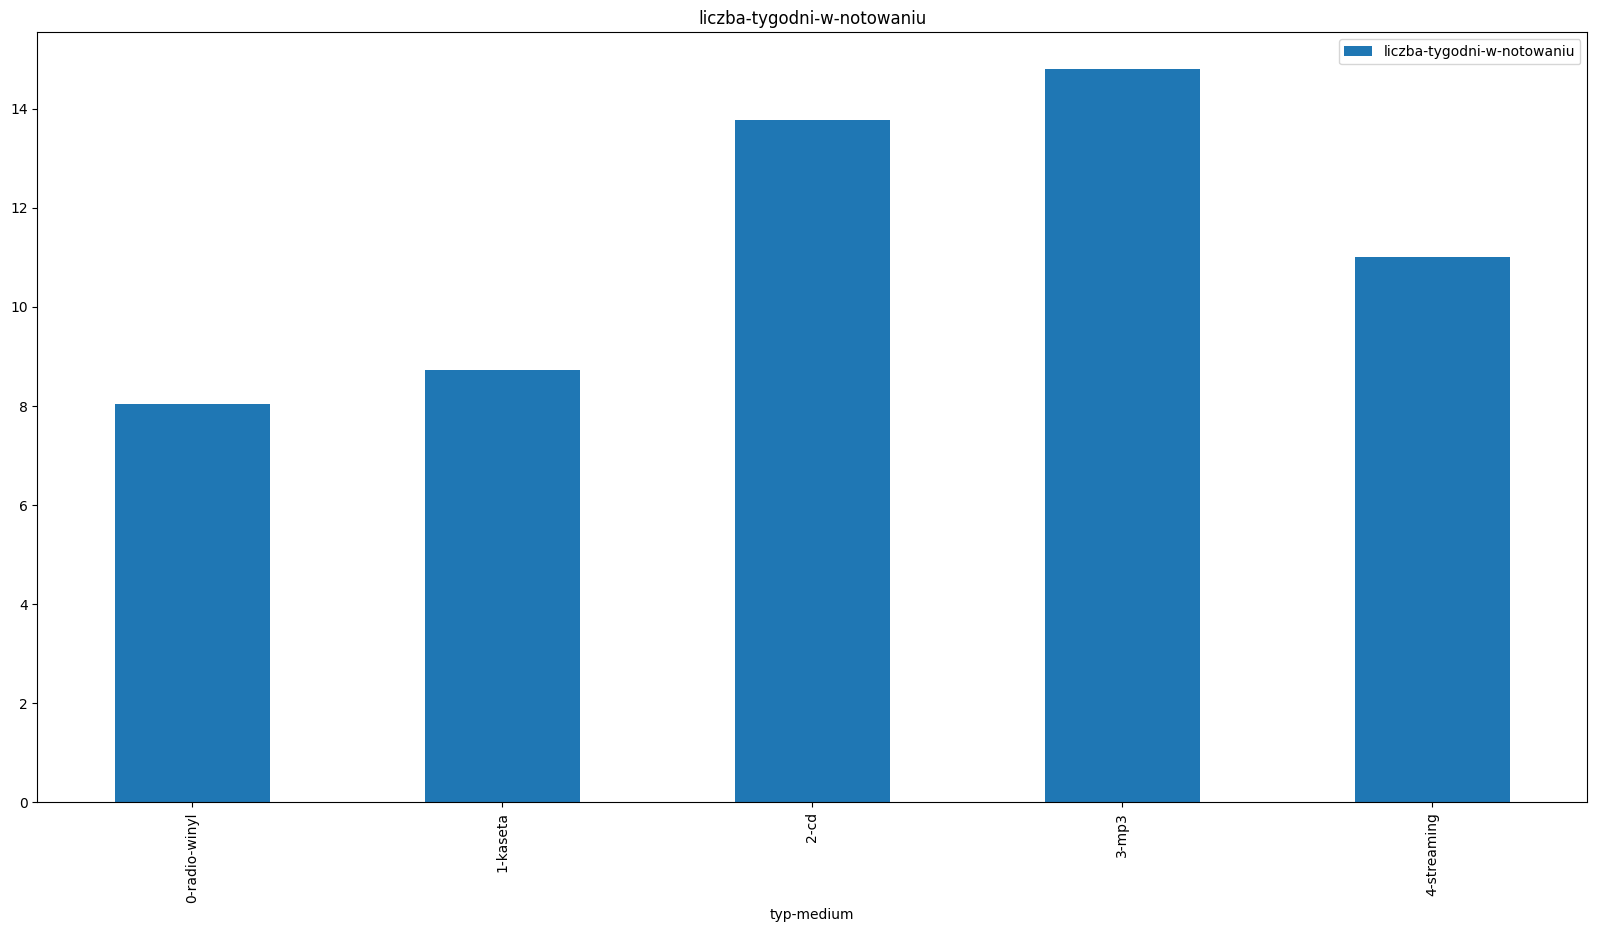

In [219]:
media = ['0-radio-winyl', '1-kaseta', '2-cd', '3-mp3', '4-streaming']
media_years = [1958, 1964, 1980, 2000, 2011]
def get_media_type(year):
    for i in range(len(media_years)):
        if year < media_years[i]:
            return media[i-1]
    return media[-1]
songs['typ-medium'] = songs['year'].apply(int).apply(get_media_type)
for i in header_names:
    media_means = songs.groupby('typ-medium').mean(i).drop(header_names.drop([i]), axis=1)
    media_means.plot.bar(figsize=(20, 10))
    plt.title(i)
    plt.show()

# Analiza eksploracyjna `songs_top_10.csv`
### Wczytanie danych

In [220]:
songs = pd.read_csv('data_sets/songs_top_10.csv')
songs['duration_ms'] = songs['duration_ms'].apply(lambda x: x / 1000 / 60)
songs.rename(columns={'duration_ms': 'duration'}, inplace=True)
songs.columns = ['artysci','tytul','data', 'akustycznosc', 'tanecznosc', 'czas-trwania-m', 'energia', 'instrumentalnosc', 'wykonanie-na-zywo', 'slownosc']
songs.head()

,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
0,"""Weird Al"" Yankovic","White & Nerdy (Parody of ""Ridin'"" by Chamillio...",2006-10-21,0.0986,0.791,2.844000,0.613,0.000000,0.0765,0.0763
1,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",2019-03-09,0.1240,0.792,2.808167,0.511,0.000090,0.1400,0.0409
2,'68 Comeback,Peepin' & Hidin' / Baby What You Want Me to Do,1983-03-12,0.0247,0.373,3.904883,0.691,0.024800,0.2120,0.0316
3,'Til Tuesday,Voices Carry,1985-07-13,0.0282,0.583,4.392883,0.574,0.000002,0.1140,0.0239
4,*NSYNC,(God Must Have Spent) A Little More Time On Yo...,1999-03-06,0.4490,0.375,4.024883,0.527,0.000000,0.3050,0.0507


## Statystyki opisowe
Z średnich wynika że: 
- najpopularniejsze utwory przeważnie nie są akustyczne
- najpopularniejsze utwory przeważnie nie są tylko instrumentalne
- najpopularniejsze utwory przeważnie są taneczne
- najpopularniejsze utwory przeważnie są energiczne
- najpopularniejsze utwory przeważnie nie są wykonaniem na żywo
- średnia długość najpopularniejszych utworów to 3 minuty i 45 sekund

In [221]:
songs.describe()

,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
count,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,0.297914,0.616230,3.763728,0.607293,0.035143,0.180851,0.069266
std,0.277637,0.154301,1.237129,0.199012,0.145608,0.152402,0.076969
min,0.000008,0.000000,0.655033,0.003420,0.000000,0.012400,0.000000
25%,0.052750,0.518000,2.991225,0.463000,0.000000,0.085950,0.032000
50%,0.206000,0.630000,3.695550,0.623000,0.000006,0.124000,0.040700
75%,0.506500,0.727000,4.306983,0.765000,0.000523,0.233000,0.065100
max,0.994000,0.988000,39.984283,0.994000,1.000000,0.996000,0.929000


### Utwory z maksimum i minimum wartości

In [222]:
header_names = songs.columns[3:]
for i in header_names:
    max = songs[songs[i].max() == songs[i]]
    if(len(max) == 1):
        print(f"Maximum wartości {i}")
        display(max)
    min = songs[songs[i].min() == songs[i]]
    if(len(min) == 1):
        print(f"Minimum wartości {i}")
        display(min)

Minimum wartości akustycznosc


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
3926,TV Girl,Lovers Rock,1985-04-13,0.000008,0.559,3.565333,0.871,0.00545,0.096,0.0397


Maximum wartości tanecznosc


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
4664,Tone-Loc,Funky Cold Medina,1989-05-06,0.0755,0.988,4.136,0.633,0.000002,0.0668,0.0888


Minimum wartości tanecznosc


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
4812,"White Noise Baby Sleep, White Noise for Babies",Clean White Noise - Loopable with no fade,1998-04-04,0.791,0.0,1.5038,0.00342,1.0,0.111,0.0


Maximum wartości czas-trwania-m


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
1006,"DJ Kay Slay, Sheek Louch, Styles P, Dave East,...","Rolling 110 Deep (feat. Sheek Louch, Styles P,...",2019-11-02,0.268,0.576,39.984283,0.978,0.0,0.688,0.356


Minimum wartości czas-trwania-m


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
3154,Party Like It's 1899,"24 Preludes, Op. 28: Prelude No. 10 in C# Mino...",1961-08-28,0.985,0.381,0.655033,0.151,0.923,0.0848,0.0542


Minimum wartości energia


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
4812,"White Noise Baby Sleep, White Noise for Babies",Clean White Noise - Loopable with no fade,1998-04-04,0.791,0.0,1.5038,0.00342,1.0,0.111,0.0


Maximum wartości instrumentalnosc


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
4812,"White Noise Baby Sleep, White Noise for Babies",Clean White Noise - Loopable with no fade,1998-04-04,0.791,0.0,1.5038,0.00342,1.0,0.111,0.0


Maximum wartości wykonanie-na-zywo


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
355,Bee Gees,Islands In The Stream - Live At The MGM Grand/...,1989-09-30,0.0965,0.751,3.77445,0.746,0.000003,0.996,0.029


Minimum wartości wykonanie-na-zywo


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
4128,The Coasters,Charlie Brown - 2007 Remaster Stereo Single Ve...,1959-04-13,0.604,0.485,2.355117,0.751,0.000001,0.0124,0.15


Maximum wartości slownosc


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
1170,Dickie Goodman,Convention '72,1972-11-18,0.795,0.533,5.159333,0.63,0.0,0.188,0.929


Minimum wartości slownosc


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
4812,"White Noise Baby Sleep, White Noise for Babies",Clean White Noise - Loopable with no fade,1998-04-04,0.791,0.0,1.5038,0.00342,1.0,0.111,0.0


## Histogramy i szeregi rozdzielcze

                     liczba utworów  prawdopodobienstwo
akustycznosc                                           
(-0.001986, 0.0994]            1723            0.350274
(0.0994, 0.199]                 685            0.139256
(0.199, 0.298]                  529            0.107542
(0.298, 0.398]                  387            0.078675
(0.398, 0.497]                  343            0.069730
(0.497, 0.596]                  292            0.059362
(0.596, 0.696]                  306            0.062208
(0.696, 0.795]                  310            0.063021
(0.795, 0.895]                  243            0.049400
(0.895, 0.994]                  101            0.020533


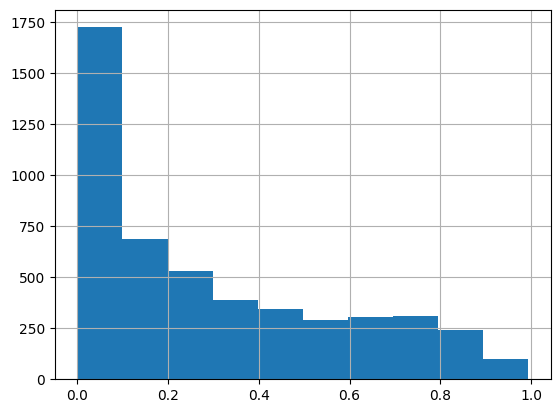

                     liczba utworów  prawdopodobienstwo
tanecznosc                                             
(-0.001988, 0.0988]               1            0.000203
(0.0988, 0.198]                  16            0.003253
(0.198, 0.296]                  133            0.027038
(0.296, 0.395]                  320            0.065054
(0.395, 0.494]                  559            0.113641
(0.494, 0.593]                  979            0.199024
(0.593, 0.692]                 1219            0.247815
(0.692, 0.79]                  1089            0.221386
(0.79, 0.889]                   492            0.100020
(0.889, 0.988]                  111            0.022566


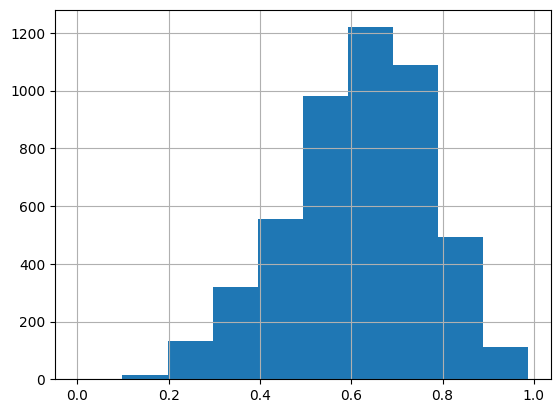

                  liczba utworów  prawdopodobienstwo
czas-trwania-m                                      
(0.615, 4.588]              4047            0.822728
(4.588, 8.521]               855            0.173816
(8.521, 12.454]               11            0.002236
(12.454, 16.387]               3            0.000610
(16.387, 20.32]                1            0.000203
(20.32, 24.253]                0            0.000000
(24.253, 28.186]               1            0.000203
(28.186, 32.118]               0            0.000000
(32.118, 36.051]               0            0.000000
(36.051, 39.984]               1            0.000203


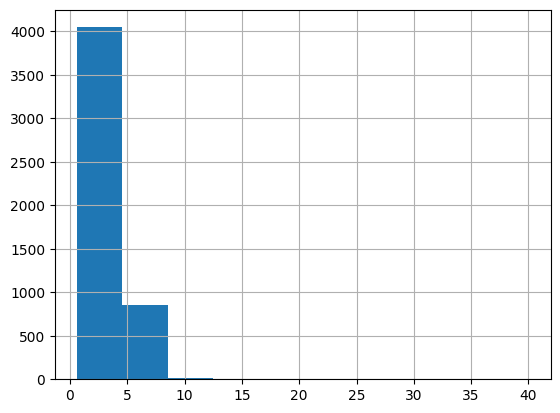

                                liczba utworów  prawdopodobienstwo
energia                                                           
(0.0014299999999999998, 0.102]              32            0.006505
(0.102, 0.202]                              97            0.019719
(0.202, 0.301]                             232            0.047164
(0.301, 0.4]                               443            0.090059
(0.4, 0.499]                               673            0.136816
(0.499, 0.598]                             771            0.156739
(0.598, 0.697]                             864            0.175645
(0.697, 0.796]                             806            0.163854
(0.796, 0.895]                             711            0.144542
(0.895, 0.994]                             290            0.058955


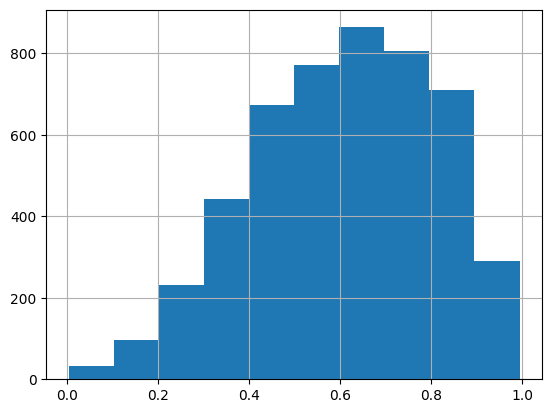

                  liczba utworów  prawdopodobienstwo
instrumentalnosc                                    
(-0.002, 0.1]               4610            0.937182
(0.1, 0.2]                    78            0.015857
(0.2, 0.3]                    28            0.005692
(0.3, 0.4]                    23            0.004676
(0.4, 0.5]                    26            0.005286
(0.5, 0.6]                    19            0.003863
(0.6, 0.7]                    23            0.004676
(0.7, 0.8]                    28            0.005692
(0.8, 0.9]                    50            0.010165
(0.9, 1.0]                    34            0.006912


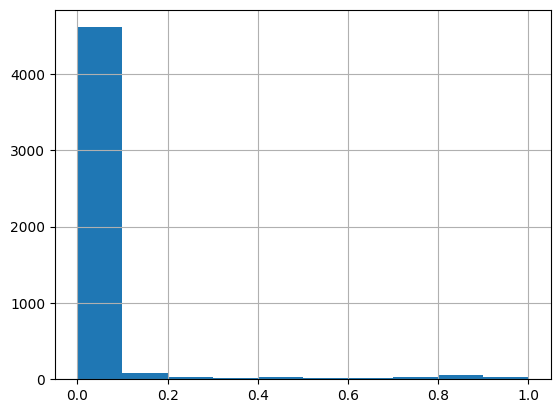

                   liczba utworów  prawdopodobienstwo
wykonanie-na-zywo                                    
(0.0104, 0.111]              2093            0.425493
(0.111, 0.209]               1448            0.294369
(0.209, 0.307]                601            0.122179
(0.307, 0.406]                427            0.086806
(0.406, 0.504]                116            0.023582
(0.504, 0.603]                 77            0.015654
(0.603, 0.701]                 79            0.016060
(0.701, 0.799]                 29            0.005896
(0.799, 0.898]                 20            0.004066
(0.898, 0.996]                 29            0.005896


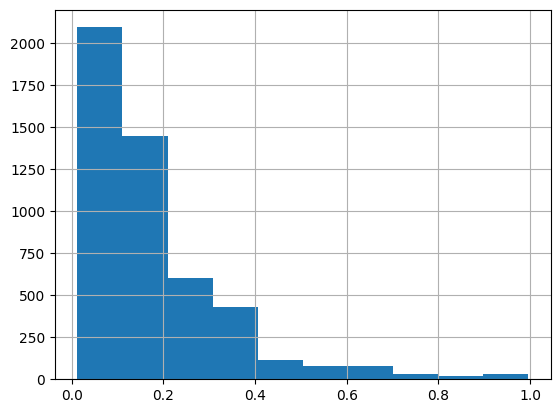

                                  liczba utworów  prawdopodobienstwo
slownosc                                                            
(-0.0019290000000000002, 0.0929]            4124            0.838382
(0.0929, 0.186]                              431            0.087619
(0.186, 0.279]                               176            0.035780
(0.279, 0.372]                               124            0.025208
(0.372, 0.464]                                46            0.009351
(0.464, 0.557]                                11            0.002236
(0.557, 0.65]                                  4            0.000813
(0.65, 0.743]                                  0            0.000000
(0.743, 0.836]                                 1            0.000203
(0.836, 0.929]                                 2            0.000407


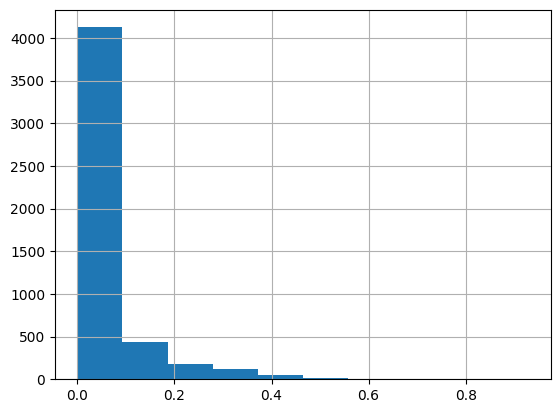

In [223]:
for i in header_names:
    frequency = songs[i].value_counts(bins=10).sort_index().to_frame()
    frequency.columns = ['liczba utworów']
    frequency['prawdopodobienstwo'] = frequency / frequency.sum()
    print(frequency)
    songs[i].hist(bins=10)
    plt.show()

### Liczba utworów instrumentalnych
97% utworów jest bez wokalu

,liczba,prawdopodobienstwo
instrumentalnosc,,
"(-0.001, 0.5]",4765,0.968693
"(0.5, 1.0]",154,0.031307


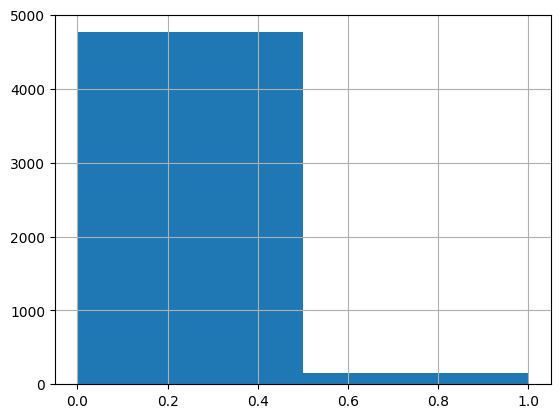

In [224]:
frequency = songs['instrumentalnosc'].value_counts(bins=[0, 0.5, 1]).to_frame()
frequency.columns = ['liczba']
frequency['prawdopodobienstwo'] = frequency / frequency.sum()
display(frequency)
songs['instrumentalnosc'].hist(bins=[0, 0.5, 1])
plt.show()

### Liczba utworów na żywo
Według Spotify wartości powyżej 0.8 oznaczają że utwór jest wykonaniem na żywo. <br>
99% utworów nie jest wykonaniem na żywo

,liczba,prawdopodobienstwo
wykonanie-na-zywo,,
"(-0.001, 0.8]",4870,0.990039
"(0.8, 1.0]",49,0.009961


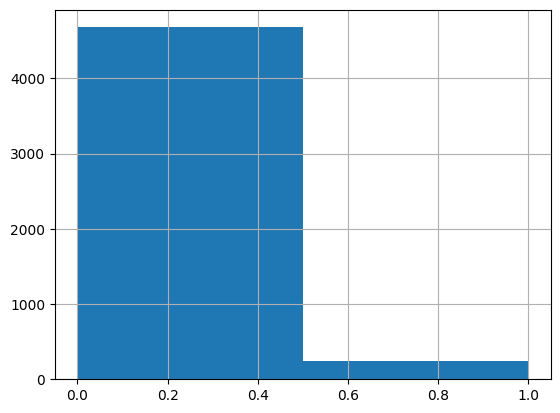

In [225]:
frequency = songs['wykonanie-na-zywo'].value_counts(bins=[0, 0.8, 1]).to_frame()
frequency.columns = ['liczba']
frequency['prawdopodobienstwo'] = frequency / frequency.sum()
display(frequency)
songs['wykonanie-na-zywo'].hist(bins=[0, 0.5, 1])
plt.show()

### Liczba utworów wokalnych
Spotify wyznacza 3 przedziały slownosc:
- 0.33 - 0.66 - utwór zawiera zarówno muzykę jak i mowę
- 0.66 - 1 - w utworze dominuje mowa (na przykład rap)
- 0 - 0.33 - utwory w których nie dominuje mowa

**Z naszych danych wynika że:**
- 97% utworów jest muzyką bez dominującego mowy
- 2% utworów jest muzyką z dominującym mową
- 0.06% utworów jest nagraniem mowy

,liczba,prawdopodobienstwo
slownosc,,
"(-0.001, 0.33]",4806,0.977028
"(0.33, 0.66]",110,0.022362
"(0.66, 1.0]",3,0.000610


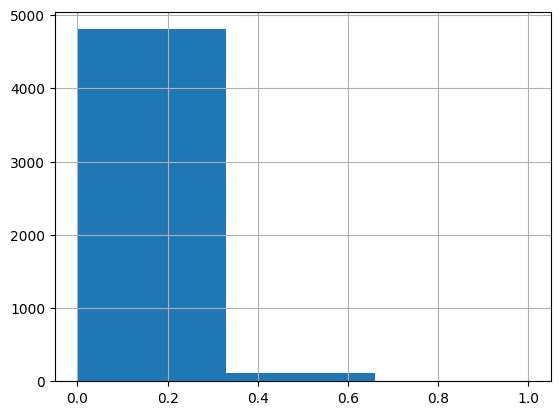

In [226]:
frequency = songs['slownosc'].value_counts(bins=[0, 0.33, 0.66, 1]).to_frame()
frequency.columns = ['liczba']
frequency['prawdopodobienstwo'] = frequency / frequency.sum()
display(frequency)
songs['slownosc'].hist(bins=[0, 0.33, 0.66, 1])
plt.show()

## Zmiany w czasie

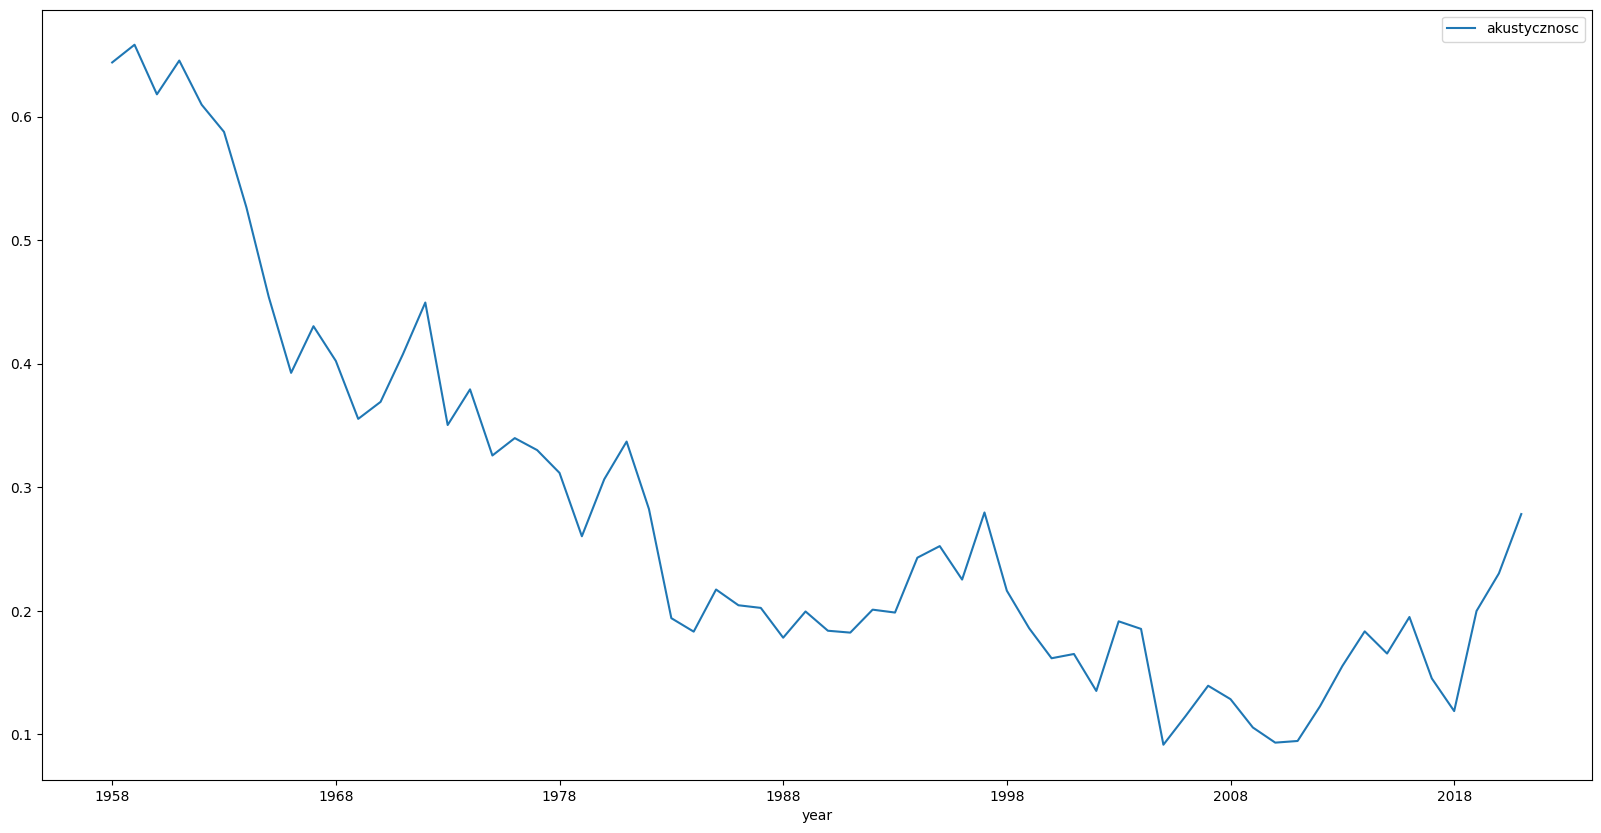

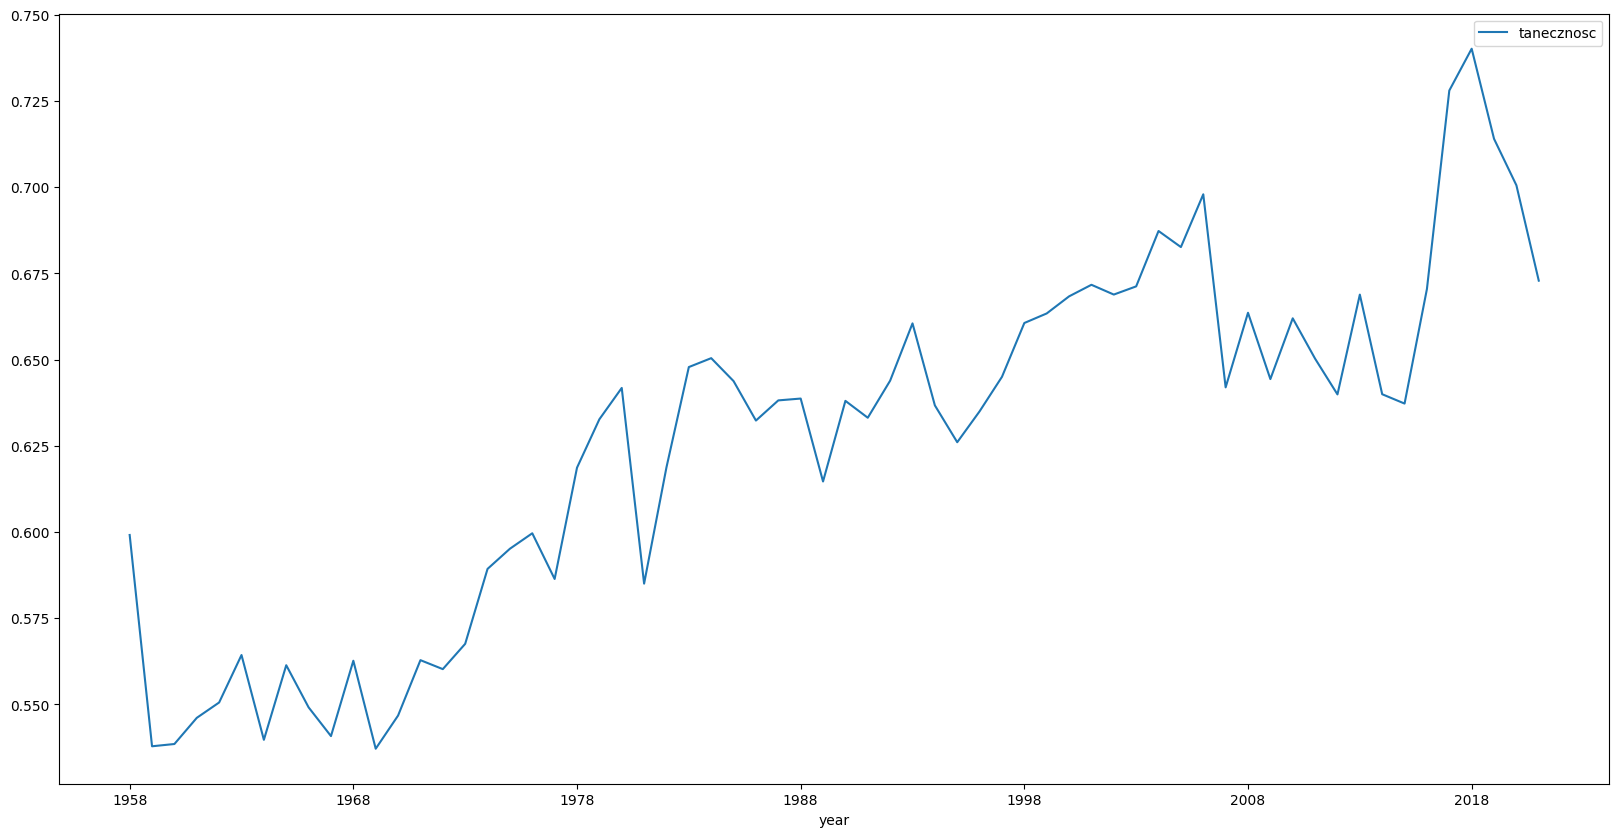

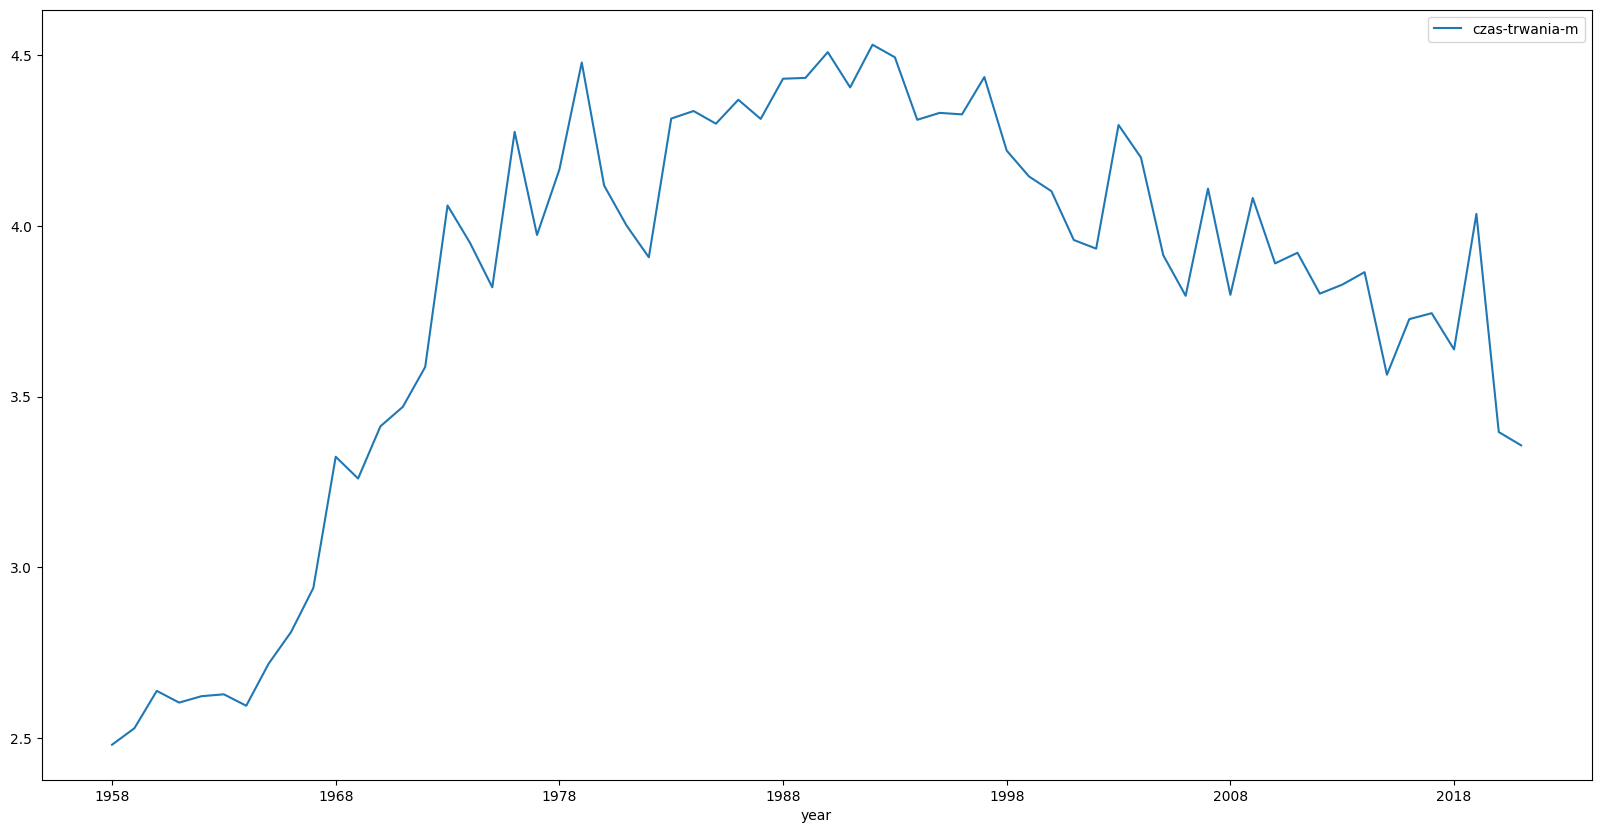

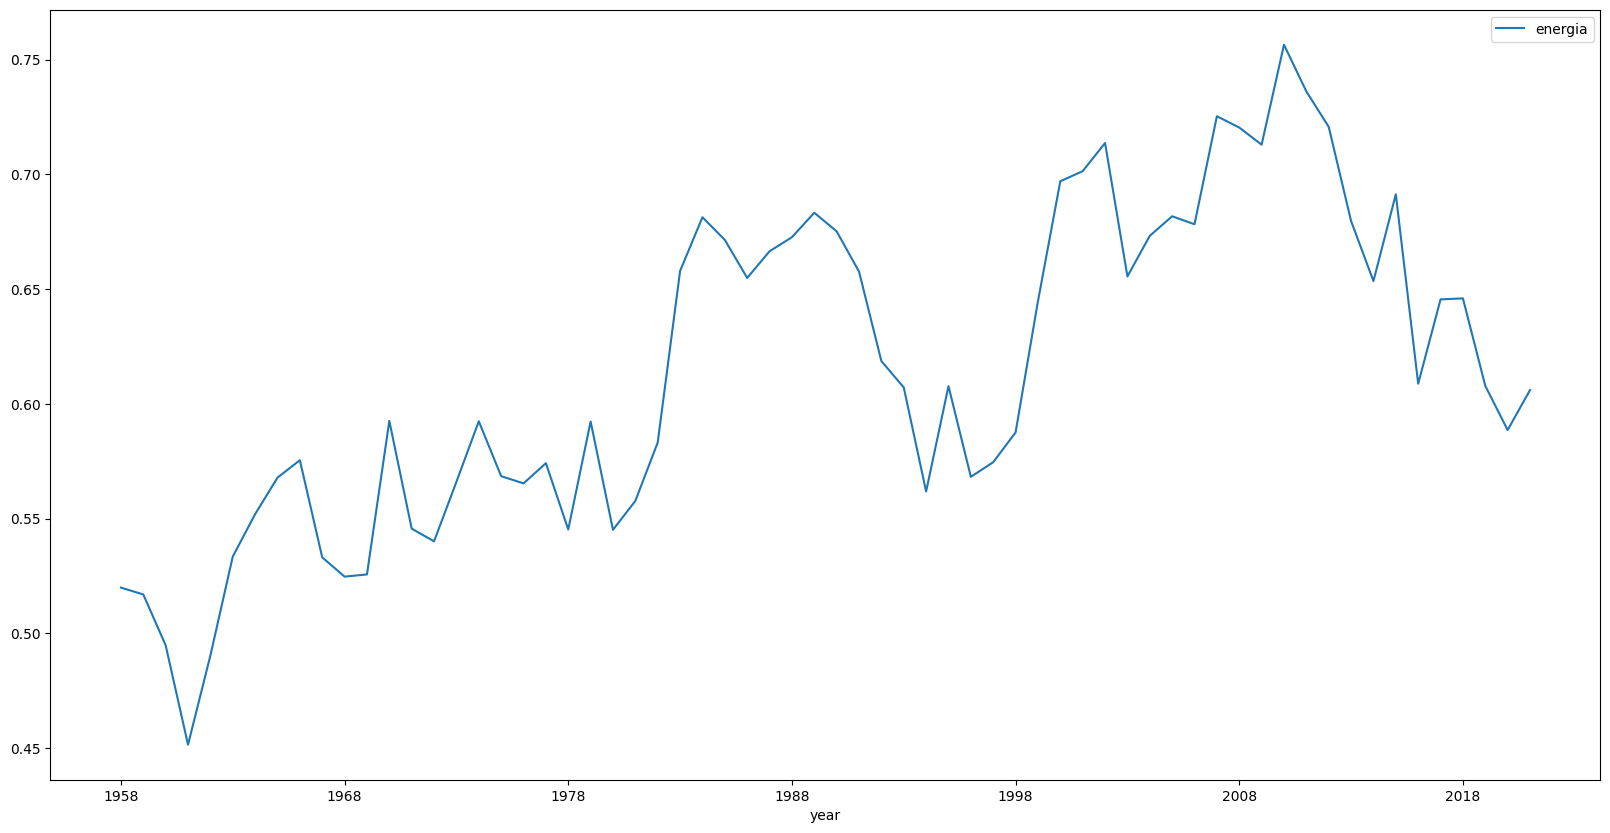

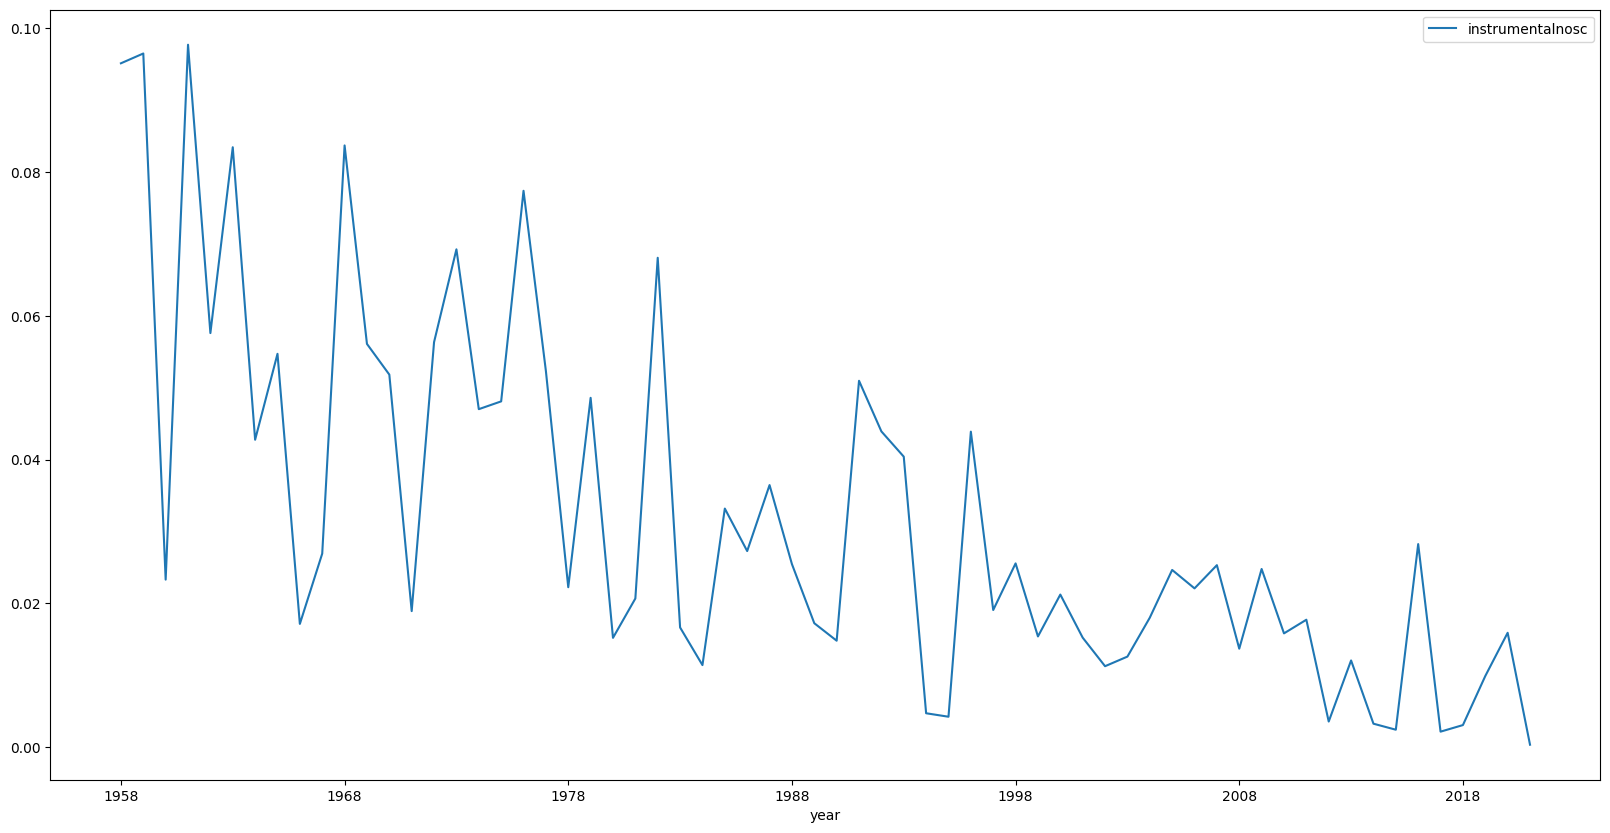

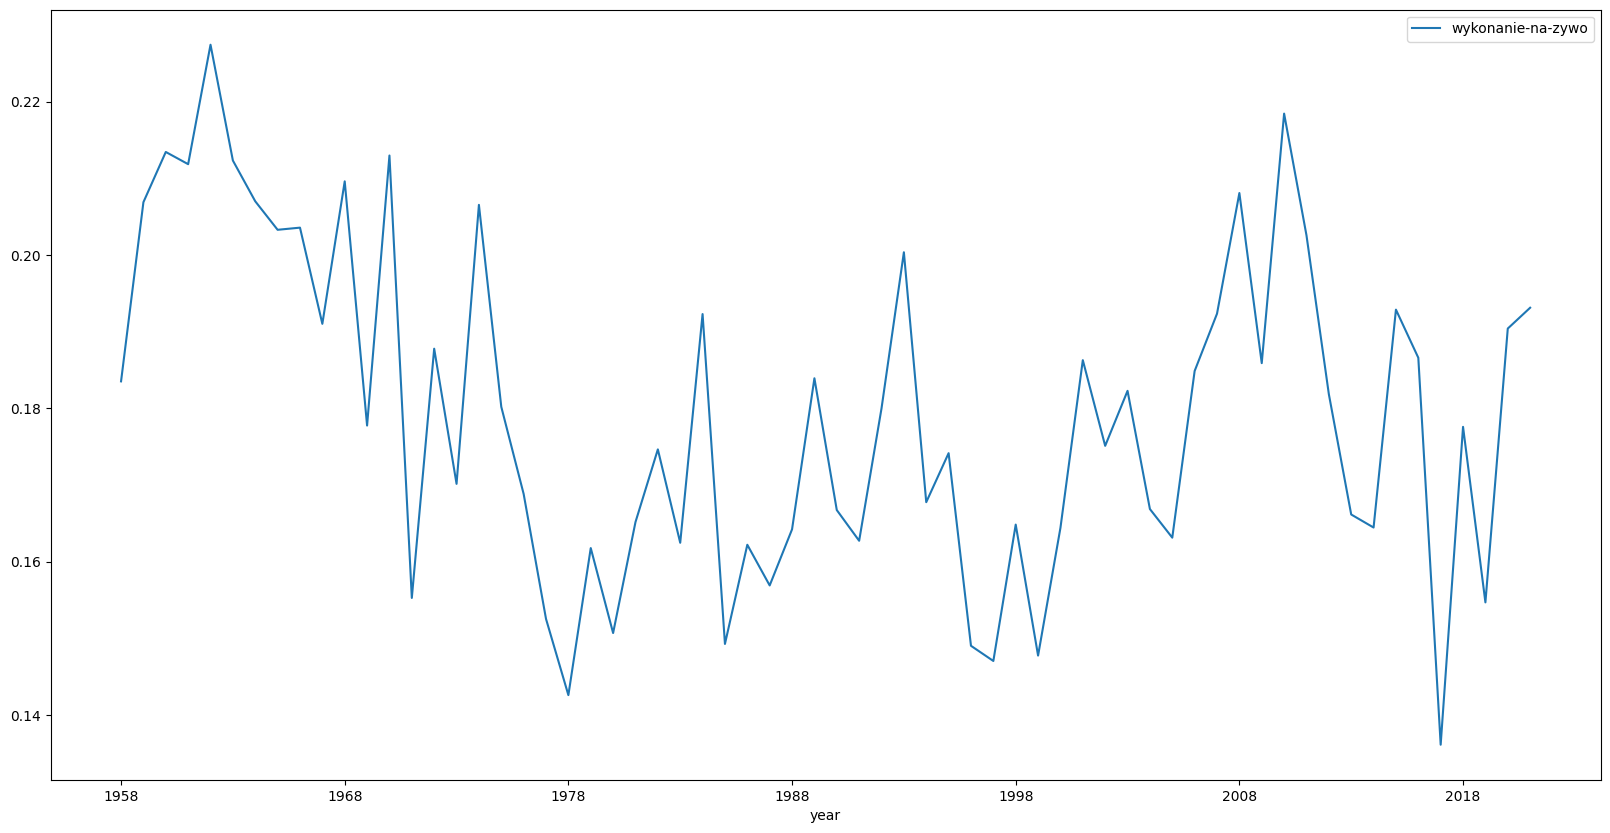

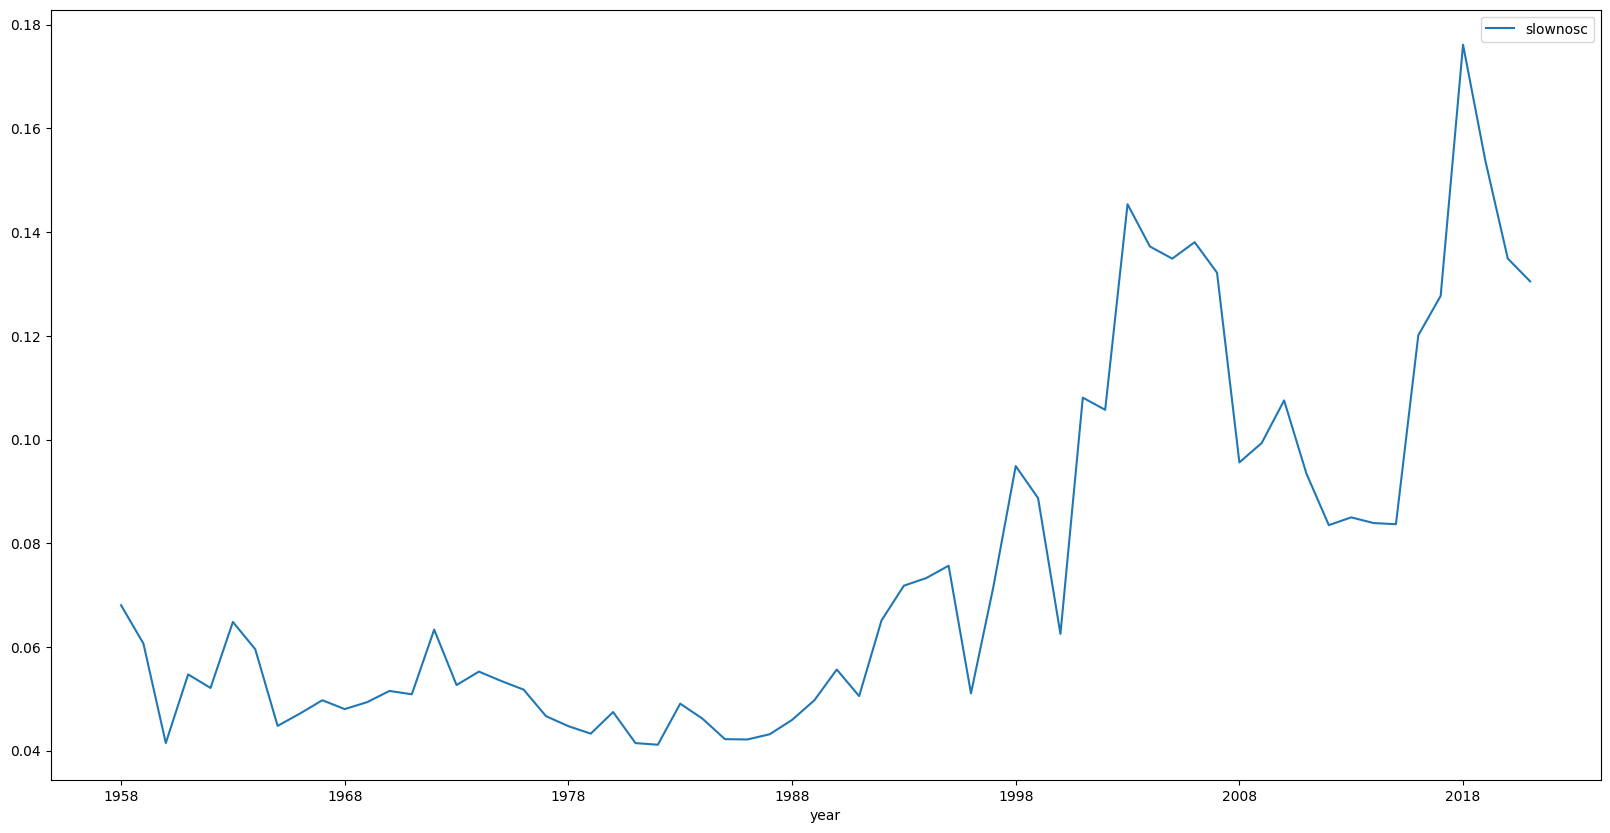

In [227]:
for i in header_names:
    songs['year'] = songs['data'].str[:4]
    header_names.drop([i])
    year_means = songs.groupby('year').mean(i).drop(header_names.drop([i]), axis=1)
    year_means.plot.line(figsize=(20, 10))
    plt.show()

## Korelacje
Nie widać wiekszych zależności pomiedzy dannymi

In [228]:
print("Korelacja Pearsona")
display(songs.corr(method="pearson", numeric_only=True))
print("Korelacja Spearmana")
display(songs.corr(method="spearman", numeric_only=True))

Korelacja Pearsona


,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
akustycznosc,1.000000,-0.346747,-0.242227,-0.569202,0.041216,0.038596,-0.148198
tanecznosc,-0.346747,1.000000,0.053738,0.231485,-0.045281,-0.133997,0.201106
czas-trwania-m,-0.242227,0.053738,1.000000,0.085679,-0.020960,-0.030882,0.026001
energia,-0.569202,0.231485,0.085679,1.000000,-0.049198,0.113110,0.166033
instrumentalnosc,0.041216,-0.045281,-0.020960,-0.049198,1.000000,0.006724,-0.057682
wykonanie-na-zywo,0.038596,-0.133997,-0.030882,0.113110,0.006724,1.000000,0.093211
slownosc,-0.148198,0.201106,0.026001,0.166033,-0.057682,0.093211,1.000000


Korelacja Spearmana


,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
akustycznosc,1.000000,-0.293229,-0.311664,-0.524238,-0.056981,0.065993,-0.244956
tanecznosc,-0.293229,1.000000,0.113436,0.192513,0.040837,-0.172533,0.321378
czas-trwania-m,-0.311664,0.113436,1.000000,0.112899,0.110898,-0.105089,0.004163
energia,-0.524238,0.192513,0.112899,1.000000,0.020446,0.070204,0.339717
instrumentalnosc,-0.056981,0.040837,0.110898,0.020446,1.000000,-0.082153,-0.110165
wykonanie-na-zywo,0.065993,-0.172533,-0.105089,0.070204,-0.082153,1.000000,0.061345
slownosc,-0.244956,0.321378,0.004163,0.339717,-0.110165,0.061345,1.000000


## Szeregi czasowe (zmiany w zależności od pojawienia się nowego medium)
- akustyczność z czasem spada
- tanecznosc z czasem delikatnie rośnie
- liczba utworow instrumentalnych bez wokalu po pojawieniu się kaset spada
- slownosc z pojawieniem się mp3 rośnie

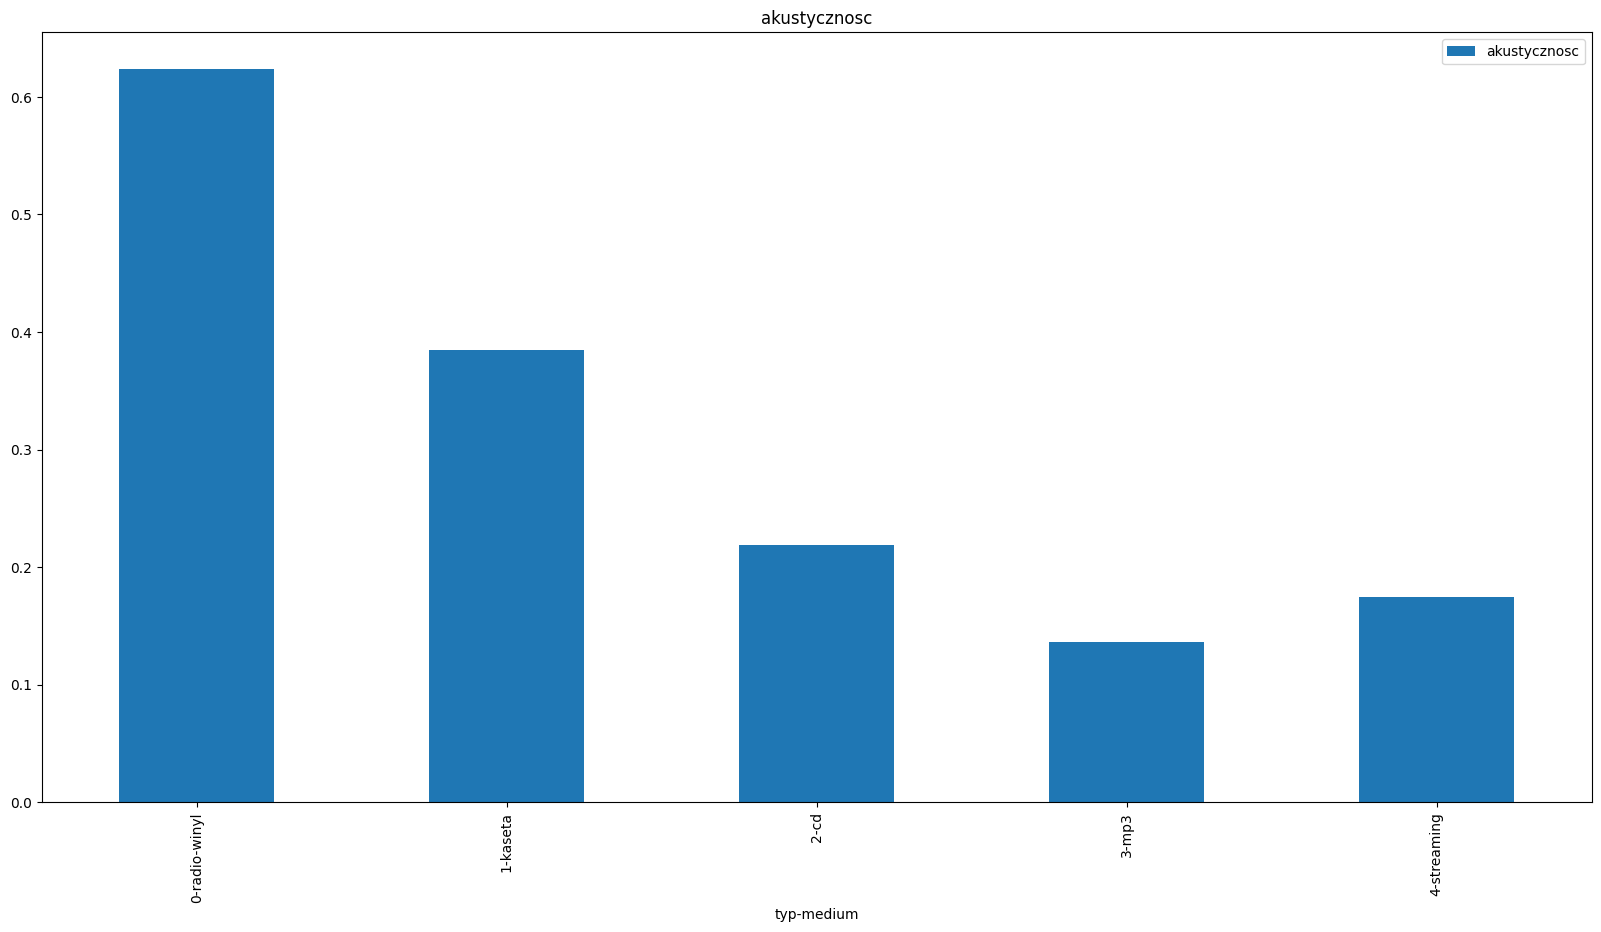

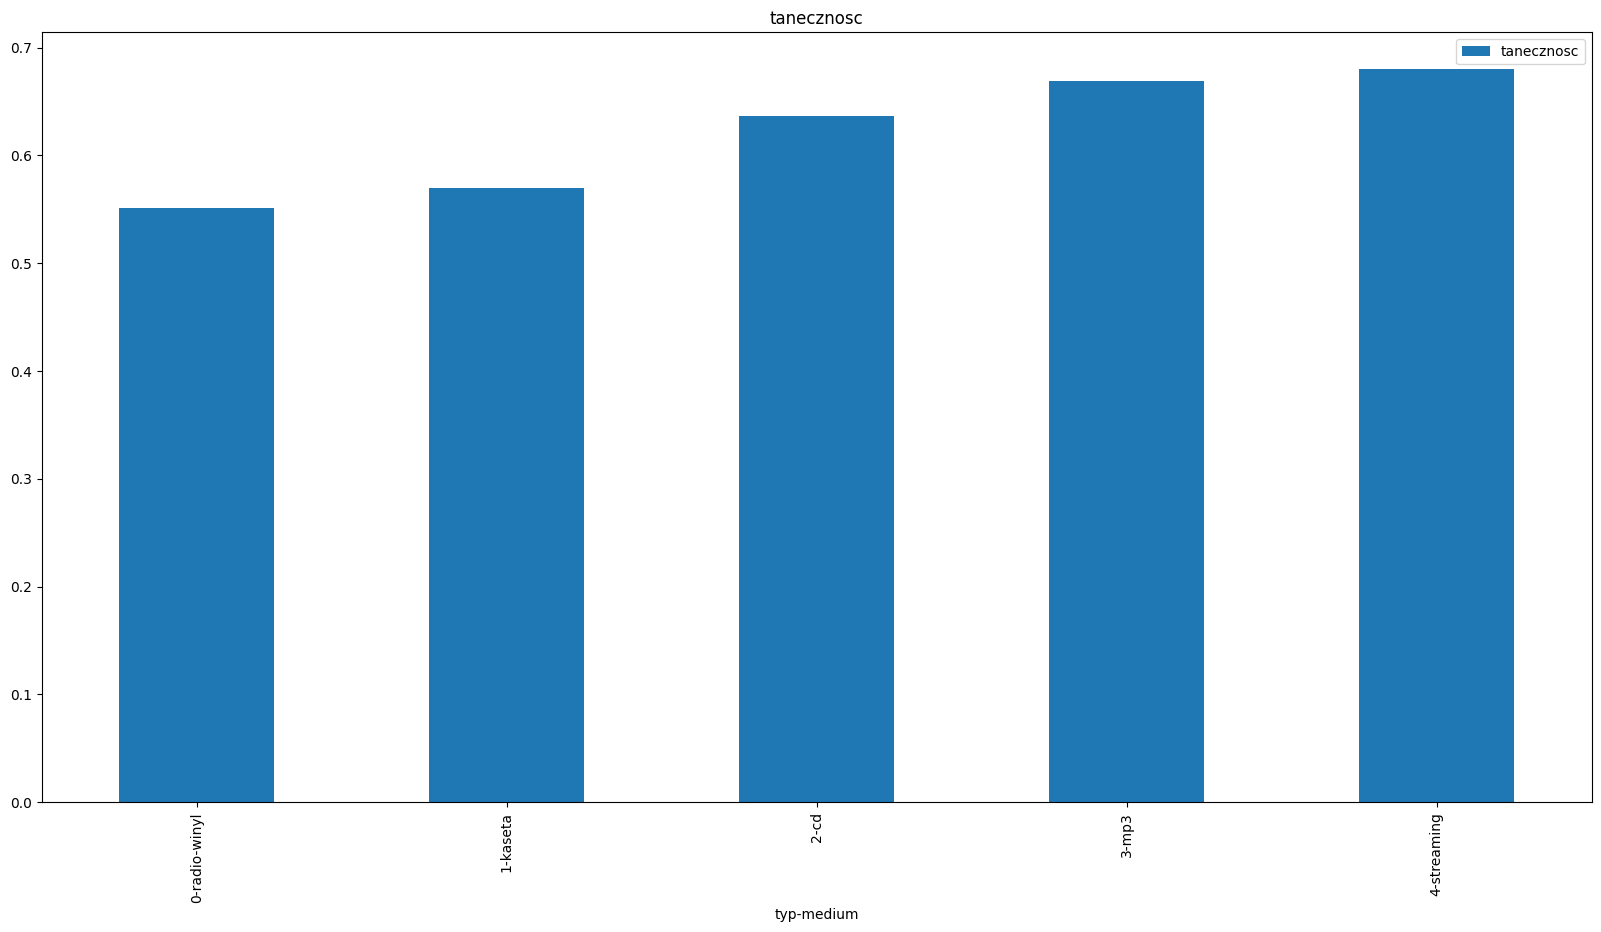

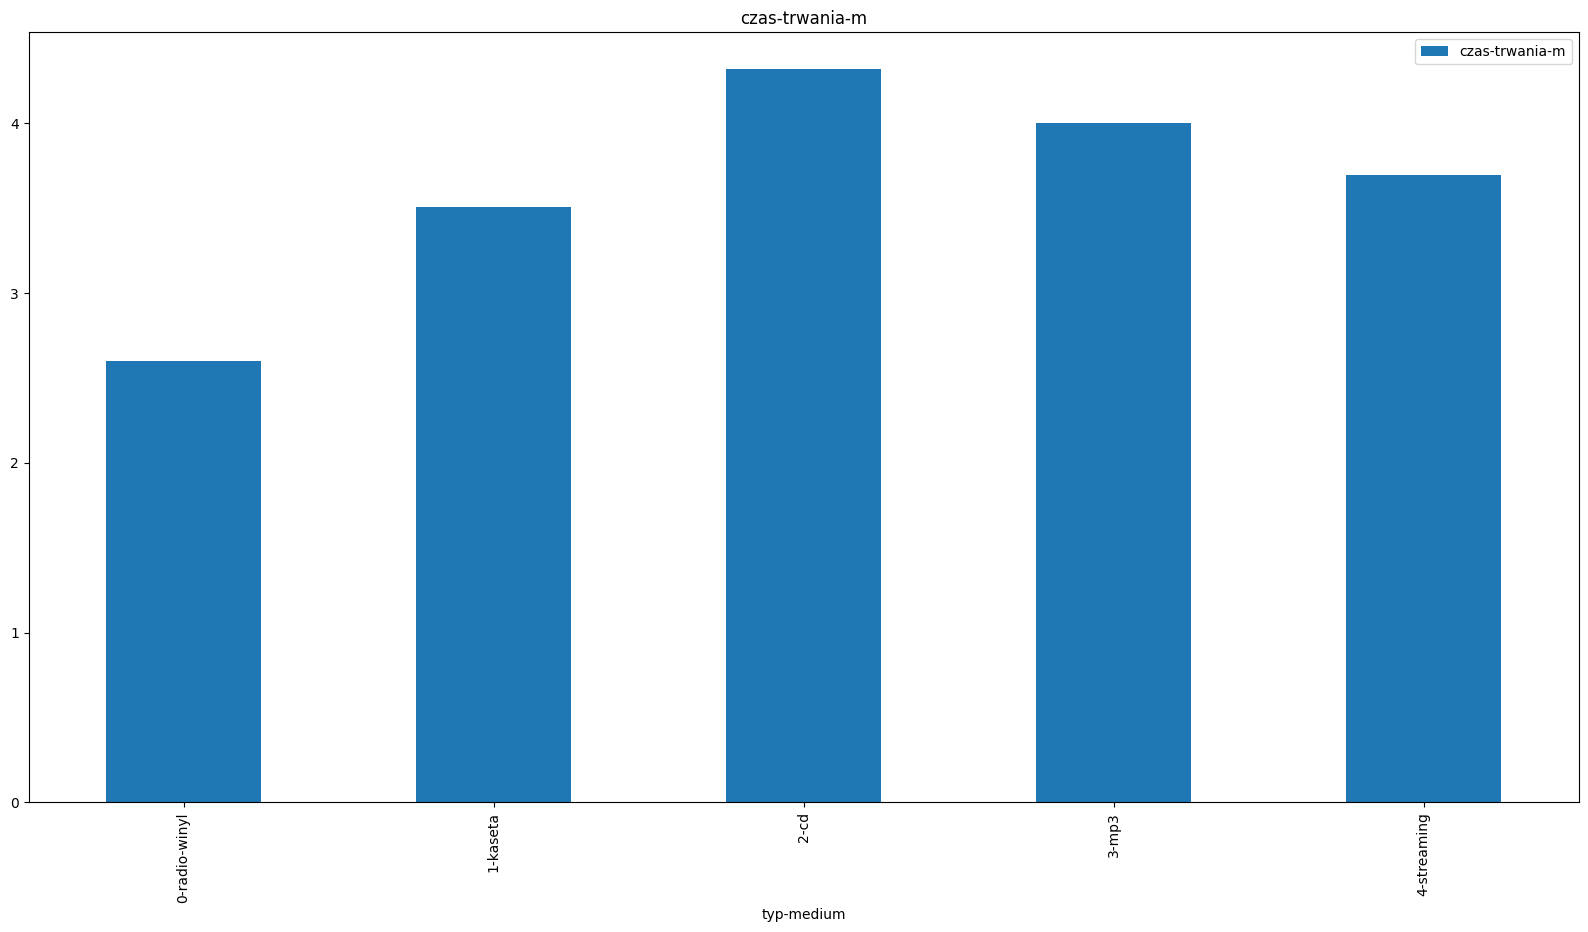

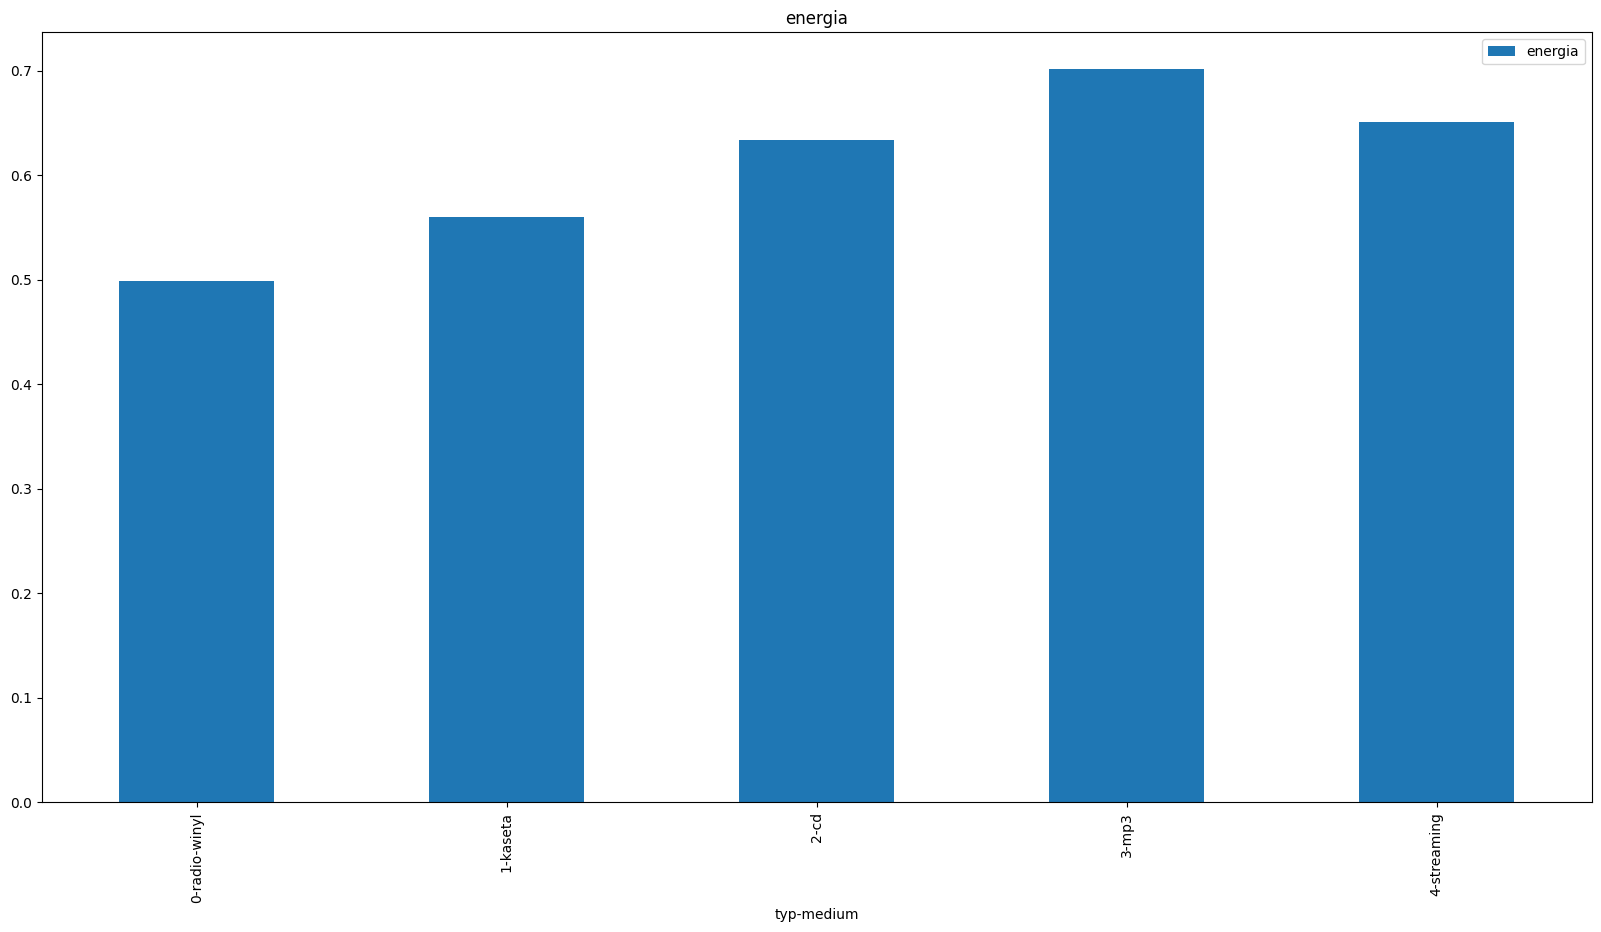

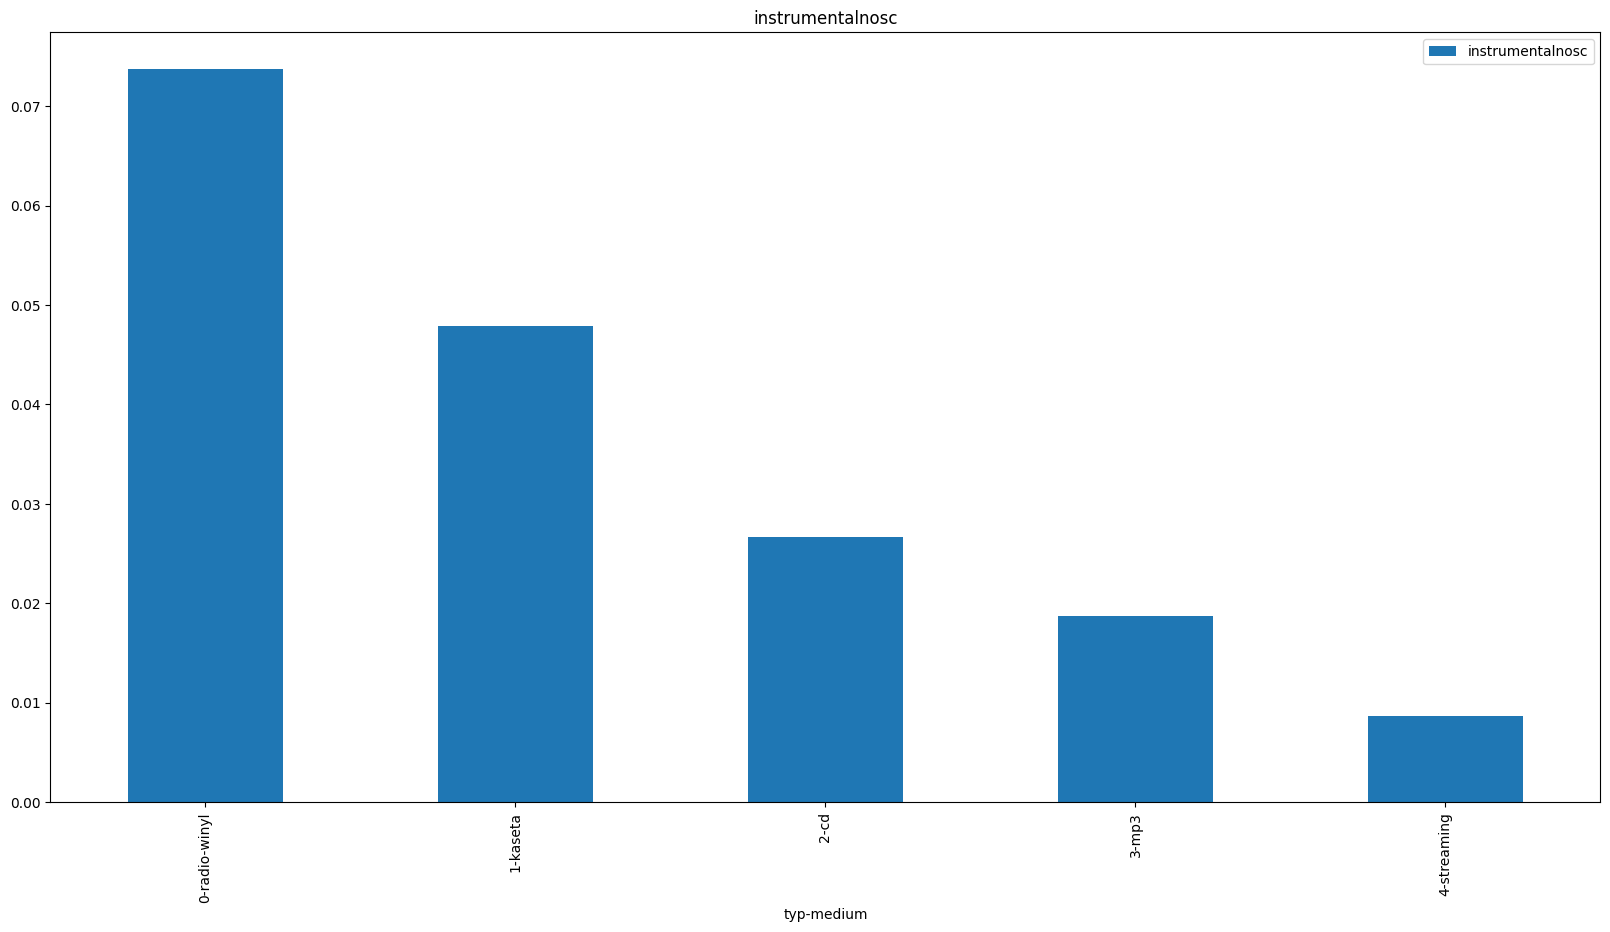

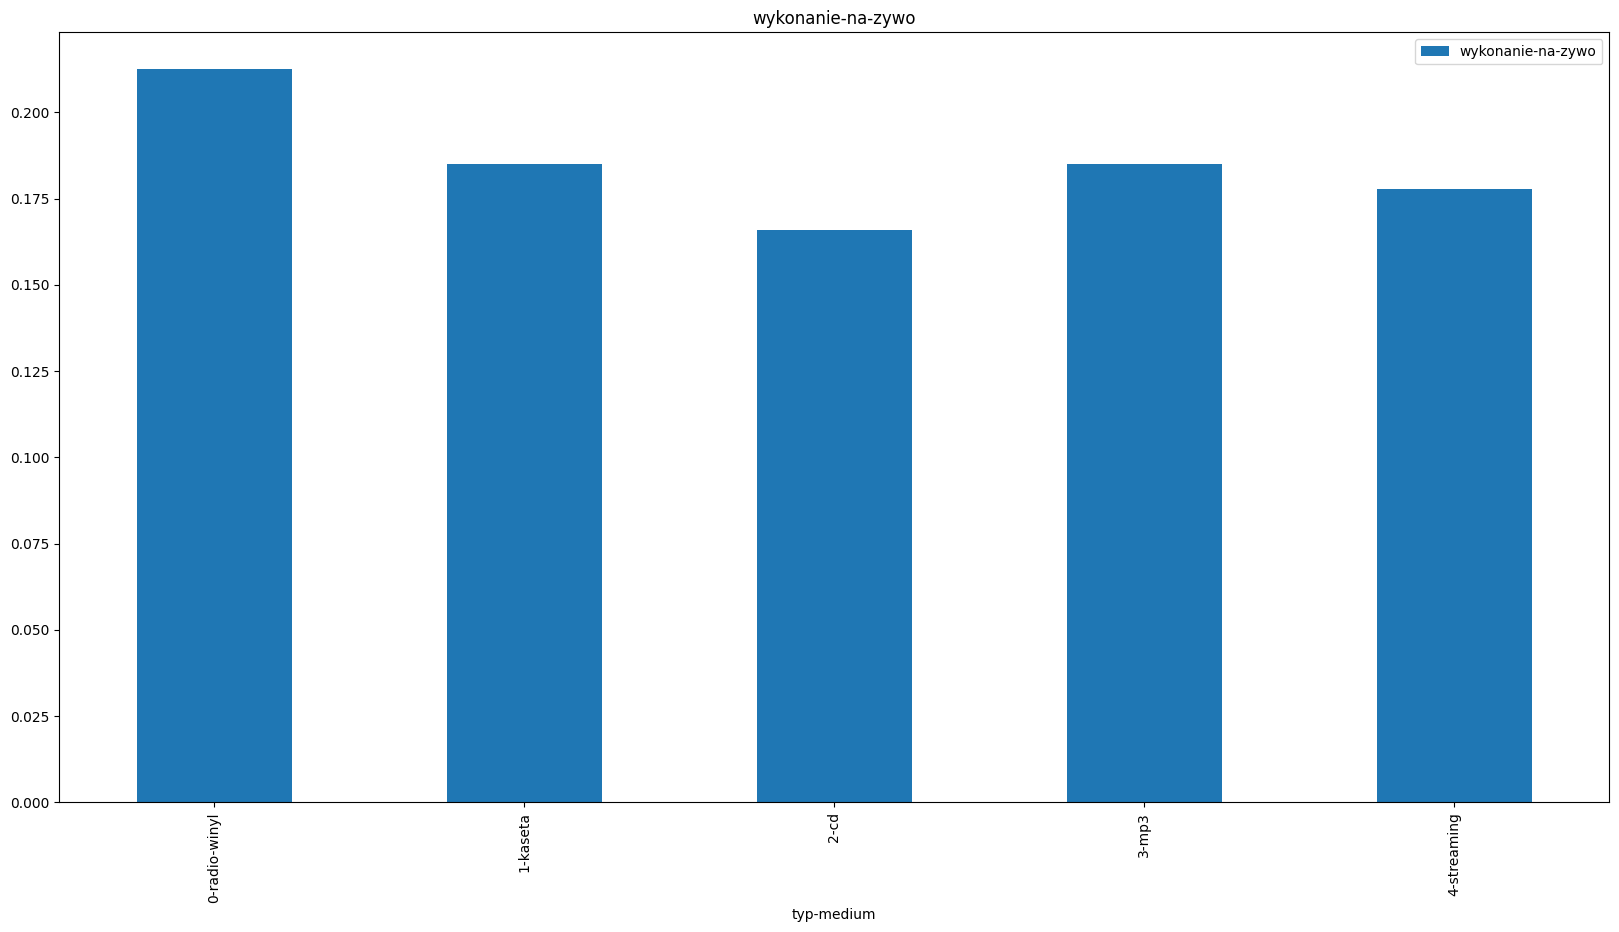

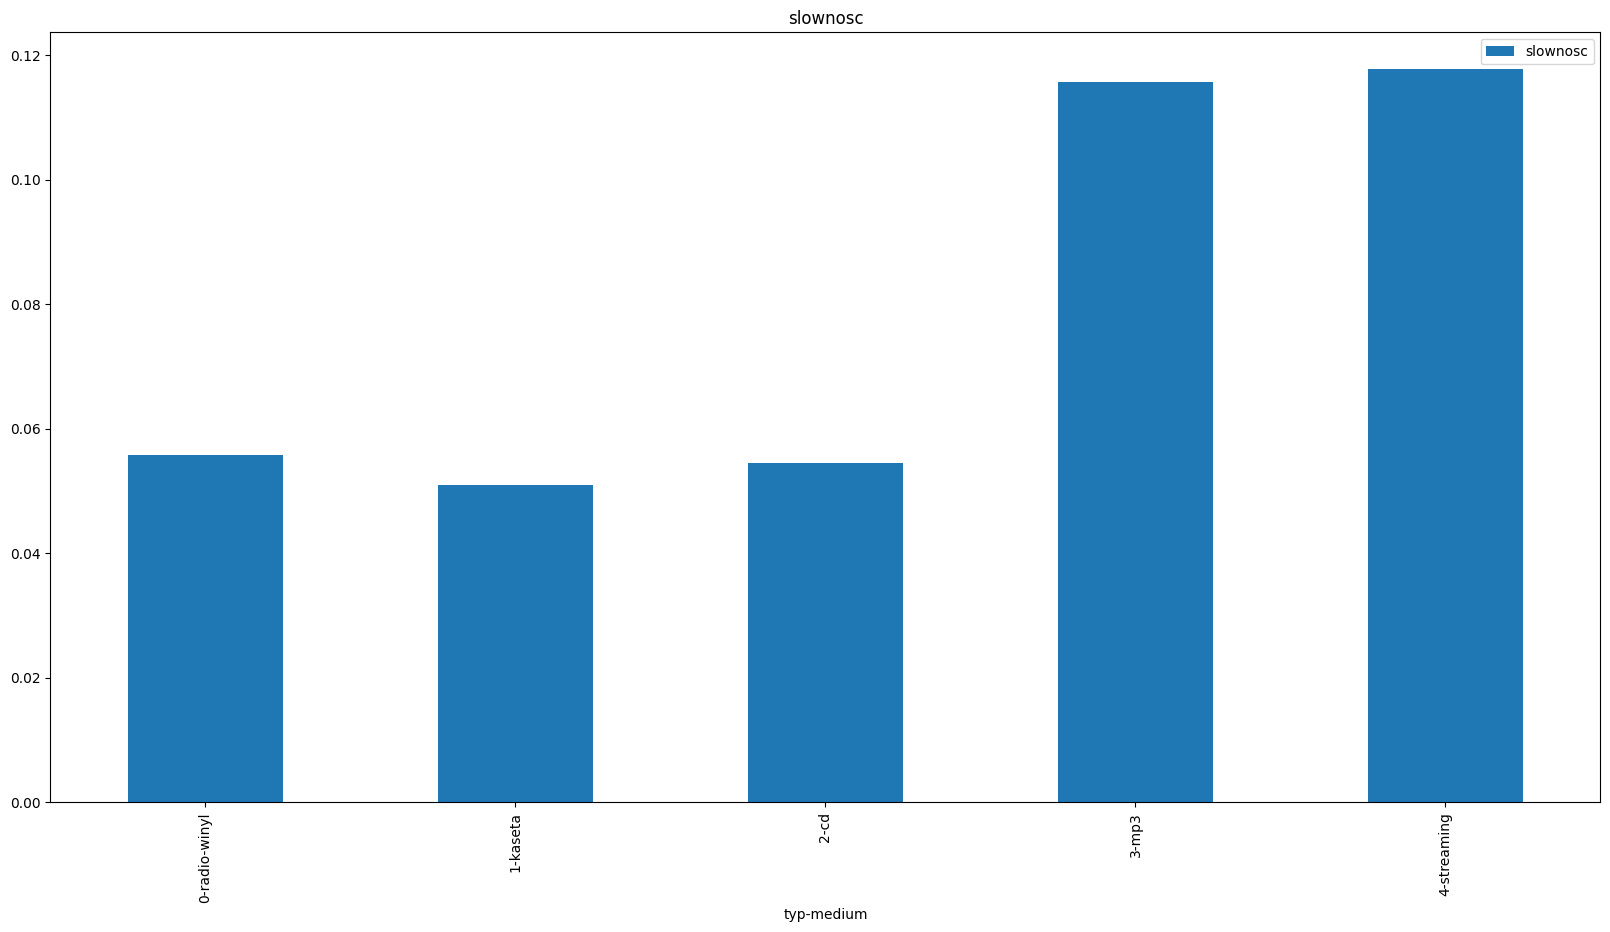

In [229]:
media = ['0-radio-winyl', '1-kaseta', '2-cd', '3-mp3', '4-streaming']
media_years = [1958, 1964, 1980, 2000, 2011]
def get_media_type(year):
    for i in range(len(media_years)):
        if year < media_years[i]:
            return media[i-1]
    return media[-1]
songs['typ-medium'] = songs['year'].apply(int).apply(get_media_type)
for i in header_names:
    media_means = songs.groupby('typ-medium').mean(i).drop(header_names.drop([i]), axis=1)
    media_means.plot.bar(figsize=(20, 10))
    plt.title(i)
    plt.show()

# Testy Statysyczne
### Wczytanie danych

In [230]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
songs = pd.read_csv('data_sets/songs.csv')
songs.columns = ['artysci', 'tytuly', 'data', 'najwyzsza-pozycja', 'liczba-tygodni-w-notowaniu']
display(songs.head())

songs_top_10 = pd.read_csv('data_sets/songs_top_10.csv')
songs_top_10['duration_ms'] = songs_top_10['duration_ms'].apply(lambda x: x / 1000 / 60)
songs_top_10.rename(columns={'duration_ms': 'duration'}, inplace=True)
songs_top_10.columns = ['artysci','tytul','data', 'akustycznosc', 'tanecznosc', 'czas-trwania-m', 'energia', 'instrumentalnosc', 'wykonanie-na-zywo', 'slownosc']
display(songs_top_10.head())

,artysci,tytuly,data,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
0,"""Groove"" Holmes",Misty,1966-09-03,44,11
1,"""Groove"" Holmes",What Now My Love,1966-10-15,96,3
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,1965-12-18,15,10
3,"""Pookie"" Hudson",I Know I Know,1963-05-25,96,1
4,"""Weird Al"" Yankovic",Amish Paradise,1996-07-13,53,16


,artysci,tytul,data,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,slownosc
0,"""Weird Al"" Yankovic","White & Nerdy (Parody of ""Ridin'"" by Chamillio...",2006-10-21,0.0986,0.791,2.844000,0.613,0.000000,0.0765,0.0763
1,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",2019-03-09,0.1240,0.792,2.808167,0.511,0.000090,0.1400,0.0409
2,'68 Comeback,Peepin' & Hidin' / Baby What You Want Me to Do,1983-03-12,0.0247,0.373,3.904883,0.691,0.024800,0.2120,0.0316
3,'Til Tuesday,Voices Carry,1985-07-13,0.0282,0.583,4.392883,0.574,0.000002,0.1140,0.0239
4,*NSYNC,(God Must Have Spent) A Little More Time On Yo...,1999-03-06,0.4490,0.375,4.024883,0.527,0.000000,0.3050,0.0507



## Wprowadzenie MP3 a liczba tygodni na liście
Na wykresach widać że średnia liczba tygodni notowaniu zwiększyła się wraz z wprowadzeniem MP3. Sprawdzimy czy jest to różnica statystycznie istotna.
### Wybór testu
Mamy dwie próby niezależne, skale przedziałową, musimy sprawdzić czy dane są opisane rozkłądem normalnym. W tym celu użyjemy testu Shapiro-Wilka (populacja ma więcej niz 5000 więc do testu użyjemy próby test ten może być użyty). Jeśli dane nie są opisane rozkładem normalnym, użyjemy testu nieparametrycznego Mann-Whitneya. Jeśli dane są opisane rozkładem normalnym, użyjemy testu t-Studenta.
### Test Shapiro-Wilka
$H_0$ - dane są opisane rozkładem normalnym <br>
$H_1$ - dane nie są opisane rozkładem normalnym <br>
$\alpha = 0.5$

In [231]:
data = songs['liczba-tygodni-w-notowaniu']
sample = data.sample(n=1000)
stat, p_value = stats.shapiro(sample)
print("Statystyka testowa:", stat)
print("Wartość p-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Dane wydają się pochodzić z rozkładu normalnego.")
else:
    print("Dane nie wydają się pochodzić z rozkładu normalnego.")

Statystyka testowa: 0.9122944474220276
Wartość p-value: 1.4227778535152196e-23
Dane nie wydają się pochodzić z rozkładu normalnego.


### Wybór testu c.d.
Z testu Shapiro-Wilka wynika, że dane nie są opisane rozkładem normalnym, więc użyjemy testu nieparametrycznego Mann-Whitneya.
### Test Mann-Whitneya
**$H_0$** - nie ma istotnej różnicy pomiedzy dwoma populacjiami <br>
**$H_1$** - istnieje istotna różnica pomiedzy dwoma populacjami <br>
**Grupa 1** - przed mp3(do 2000) <br>
**Grupa 2** - po mp3(od 2000) <br>
$\alpha = 0.5$

In [232]:
songs['data'] = pd.to_datetime(songs['data'])
data1 = songs[songs['data'] < '2000-01-01']
data2 = songs[songs['data'] >= '2000-01-01']
stat, p_value = stats.mannwhitneyu(data1['liczba-tygodni-w-notowaniu'], data2['liczba-tygodni-w-notowaniu'])
print("Statystyka testowa U:", stat)
print("Wartość p-value:", '%.10f' % p_value)
alpha = 0.05
if p_value > alpha:
    print("Brak istotnych różnic między grupami.")
else:
    print("Obserwowane różnice między grupami są istotne.")

Statystyka testowa U: 91431488.0
Wartość p-value: 0.0000501768
Obserwowane różnice między grupami są istotne.


### Wnioski
P-value jest mniejsze od $\alpha$, więc odrzucamy $H_0$ na rzecz $H_1$. Istnieje istotna różnica w liczbie tygodni na liście przed i po wprowadzeniu mp3. Po wprowadzeniu mp3 liczba tygodni na liście jest większa i może to być spowodowane nowym medium słuchania muzyki. Może to wynikać z zwiększenia dostępności do muzyki co za tym idzie większą liczbą słuchaczy.

## Pojawienie się nowych instrumentów i technologi a muzyka akustycza
Wraz z pojawieniem się nowych instrumentów i technologi muzyka stała się bardziej elektroniczna, zaczeły pojawiać się nowe instrumenty. Według wykresów widać ustępstwo muzyki akustycznej. Sprawdzimy czy jest to różnica statystycznie istotna. Wprowadzenie nowych instrumetów szacuje się na rok 1960/1970.
### Wybór testu
Tak jak poprzednio sprawdzimy czy dane są opisane rozkłądem normalnym (test Shapiro-Wilka). Jeśli dane nie są opisane rozkładem normalnym, użyjemy testu nieparametrycznego Mann-Whitneya. Jeśli dane są opisane rozkładem normalnym, użyjemy testu t-Studenta.
### Test Shapiro-Wilka
$H_0$ - dane są opisane rozkładem normalnym <br>
$H_1$ - dane nie są opisane rozkładem normalnym <br>
$\alpha = 0.5$

In [233]:
data = songs_top_10['akustycznosc']
sample = data.sample(n=1000)
stat, p_value = stats.shapiro(sample)
print("Statystyka testowa:", stat)
print("Wartość p-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Dane wydają się pochodzić z rozkładu normalnego.")
else:
    print("Dane nie wydają się pochodzić z rozkładu normalnego.")

Statystyka testowa: 0.8743888139724731
Wartość p-value: 1.2748580599969561e-27
Dane nie wydają się pochodzić z rozkładu normalnego.


### Wybór testu c.d.
Ponownie dane nie są opisane rozkładem normalnym dlatego wybieramy test nieparametryczny Mann-Whitneya.
### Test Mann-Whitneya
**$H_0$** - nie ma istotnej różnicy pomiedzy dwoma populacjiami <br>
**$H_1$** - istnieje istotna różnica pomiedzy dwoma populacjami <br>
**Grupa 1** - przed 1965(przed instrumentami elektrycznymi) <br>
**Grupa 2** - po 1965(po instrumentami elektrycznymi) <br>
$\alpha = 0.5$

In [234]:
songs_top_10['data'] = pd.to_datetime(songs_top_10['data'])
data1 = songs_top_10[songs_top_10['data'] < '1965-01-01']
data2 = songs_top_10[songs_top_10['data'] >= '1965-01-01']
stat, p_value = stats.mannwhitneyu(data1['akustycznosc'], data2['akustycznosc'])
print("Statystyka testowa U:", stat)
print("Wartość p-value:", '%.10f' % p_value)
alpha = 0.05
if p_value > alpha:
    print("Brak istotnych różnic między grupami.")
else:
    print("Obserwowane różnice między grupami są istotne.")

Statystyka testowa U: 2252126.5
Wartość p-value: 0.0000000000
Obserwowane różnice między grupami są istotne.


### Wnioski
P-value jest mniejsze niż alpha więc odrzucamy $H_0$ na rzecz $H_1$. Istnieje istotna różnica w akustyczności utworów przed nowymi instrumentami oraz po. Po wprowadzeniu nowych instrumentów muzyka stała się bardziej elektroniczna.
### Serwisy Streamingowe a muzyka
Od 2010 roku serwisy streamingowe zaczeły dominować na rynku muzyki. Zmienił sie sposób dystrybucji muzyki oraz zarobku dla artystów. Od tego czasu liczy się przyciągnięcie słuchacza przez conajmniej 30 sekund. Niektórzy twierdzą że spowodowało to coraz więcej muzyki z szybko wchodzącym wokalem oraz dominującym wokalem. Sprawdzmy czy jest to różnica statystycznie istotna na podstawie liryczność, instrumentalności oraz długości trwania utworu.
### Słowność a serwisy streamingowe
#### Wybór testu
Powtarzamy krok pierwszy z poprzednich testów.
#### Test Shapiro-Wilka
$H_0$ - dane są opisane rozkładem normalnym <br>
$H_1$ - dane nie są opisane rozkładem normalnym <br>
$\alpha = 0.5$

In [235]:
data = songs_top_10['slownosc']
sample = data.sample(n=1000)
stat, p_value = stats.shapiro(sample)
print("Statystyka testowa:", stat)
print("Wartość p-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Dane wydają się pochodzić z rozkładu normalnego.")
else:
    print("Dane nie wydają się pochodzić z rozkładu normalnego.")

Statystyka testowa: 0.6045840978622437
Wartość p-value: 7.959375277364961e-43
Dane nie wydają się pochodzić z rozkładu normalnego.


#### Wybór testu c.d.
Dane ponownie nie wydają się pochodzić z testu normalnego. Dlatego wybieramy test nieparametryczny Mann-Whitneya.
#### Test Mann-Whitneya
**$H_0$** - nie ma istotnej różnicy pomiedzy dwoma populacjiami <br>
**$H_1$** - istnieje istotna różnica pomiedzy dwoma populacjami <br>
**Grupa 1** - przed 2010 (przed serwisami streamingowymi) <br>
**Grupa 2** - po 2010 (po serwisami streamingowymi) <br>
$\alpha = 0.5$

In [236]:
songs_top_10['data'] = pd.to_datetime(songs_top_10['data'])
data1 = songs_top_10[songs_top_10['data'] < '2010-01-01']
data2 = songs_top_10[songs_top_10['data'] >= '2010-01-01']
stat, p_value = stats.mannwhitneyu(data1['slownosc'], data2['slownosc'])
print("Statystyka testowa U:", stat)
print("Wartość p-value:", '%.10f' % p_value)
alpha = 0.05
if p_value > alpha:
    print("Brak istotnych różnic między grupami.")
else:
    print("Obserwowane różnice między grupami są istotne.")

Statystyka testowa U: 785510.5
Wartość p-value: 0.0000000000
Obserwowane różnice między grupami są istotne.


#### Wątpliwości
Według testu są różnice pomiedzy dwoma populacjiami, jednak według wykresów nie ma dużej różnicy w liryczności utworów pomiedzy wprowadzeniem mp3 a serwisami streamingowymi. Sprawdzmy to jeszcze raz ale tym razem w przypadku grupy 2 weźmiemy przedział 2000-2010. Być może popełniliśmy błąd I rodzaju.
#### Test Mann-Whitneya
**$H_0$** - nie ma istotnej różnicy pomiedzy dwoma populacjiami <br>
**$H_1$** - istnieje istotna różnica pomiedzy dwoma populacjami <br>
**Grupa 1** - 2000-2010 (przed serwisami streamingowymi, po mp3) <br>
**Grupa 2** - po 2010 (po serwisami streamingowymi) <br>
$\alpha = 0.5$

In [237]:
songs_top_10['data'] = pd.to_datetime(songs_top_10['data'])
data1 = songs_top_10[songs_top_10['data'] < '2010-01-01']
data1 = data1[data1['data'] >= '2000-01-01']
data2 = songs_top_10[songs_top_10['data'] >= '2010-01-01']
stat, p_value = stats.mannwhitneyu(data1['slownosc'], data2['slownosc'])
print("Statystyka testowa U:", stat)
print("Wartość p-value:", '%.10f' % p_value)
alpha = 0.05
if p_value > alpha:
    print("Brak istotnych różnic między grupami.")
else:
    print("Obserwowane różnice między grupami są istotne.")

Statystyka testowa U: 184358.5
Wartość p-value: 0.2221349121
Brak istotnych różnic między grupami.


#### Wnioski z drugiego testu
P-value jest większe niż alpha więc nie odrzucamy $H_0$. W takim razie nie ma zmiany pomiedzy wprowadzeniem mp3 a wprowadzeniem serwisów streamingowych. Sprawdzmy czy jest różnica statystyczna miedzy wprowadzeniem mp3 a lirycznością.
#### Test Mann-Whitneya
**$H_0$** - nie ma istotnej różnicy pomiedzy dwoma populacjiami <br>
**$H_1$** - istnieje istotna różnica pomiedzy dwoma populacjami <br>
**Grupa 1** - przed 2000 <br>
**Grupa 2** - po 2000 <br>
$\alpha = 0.5$

In [238]:
songs_top_10['data'] = pd.to_datetime(songs_top_10['data'])
data1 = songs_top_10[songs_top_10['data'] < '2000-01-01']
data2 = songs_top_10[songs_top_10['data'] >= '2000-01-01']
stat, p_value = stats.mannwhitneyu(data1['slownosc'], data2['slownosc'])
print("Statystyka testowa U:", stat)
print("Wartość p-value:", '%.10f' % p_value)
alpha = 0.05
if p_value > alpha:
    print("Brak istotnych różnic między grupami.")
else:
    print("Obserwowane różnice między grupami są istotne.")

Statystyka testowa U: 1211966.0
Wartość p-value: 0.0000000000
Obserwowane różnice między grupami są istotne.


#### Wnioski po testach slownosci
Po wprowadzeniu serwisów streamingowych liryczność utworów się nie zmieniła, proces ten zaczął pojawiać się już po wprowadzeniu mp3. Czyli pierwszy test prawdopodobnie był błędny.
### Instrumentalność a serwisy streamingowe
Ponownie porównamy dane z roku 2000-2010 z danymi po 2010. Jest to bardziej wiarygodne.
#### Wybór testu
Powtarzamy krok pierwszy z poprzednich testów.
#### Test Shapiro-Wilka
$H_0$ - dane są opisane rozkładem normalnym <br>
$H_1$ - dane nie są opisane rozkładem normalnym <br>
$\alpha = 0.5$

In [239]:
data = songs_top_10['instrumentalnosc']
sample = data.sample(n=1000)
stat, p_value = stats.shapiro(sample)
print("Statystyka testowa:", stat)
print("Wartość p-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Dane wydają się pochodzić z rozkładu normalnego.")
else:
    print("Dane nie wydają się pochodzić z rozkładu normalnego.")

Statystyka testowa: 0.24663591384887695
Wartość p-value: 0.0
Dane nie wydają się pochodzić z rozkładu normalnego.


#### Wybór testu c.d.
Dane ponownie nie pochodzą z rozkłądu normalnego wybieramy zatem test nieparametryczny Mann-Whitneya.
#### Test Mann-Whitneya
**$H_0$** - nie ma istotnej różnicy pomiedzy dwoma populacjiami <br>
**$H_1$** - istnieje istotna różnica pomiedzy dwoma populacjami <br>
**Grupa 1** - 2000 - 2010 (przed serwisami streamingowym, po mp3) <br>
**Grupa 2** - po 2010 (po serwisami streamingowymi)<br>
$\alpha = 0.5$

In [240]:
songs_top_10['data'] = pd.to_datetime(songs_top_10['data'])
data1 = songs_top_10[songs_top_10['data'] < '2010-01-01']
data1 = data1[data1['data'] >= '2000-01-01']
data2 = songs_top_10[songs_top_10['data'] >= '2010-01-01']
stat, p_value = stats.mannwhitneyu(data1['instrumentalnosc'], data2['instrumentalnosc'])
print("Statystyka testowa U:", stat)
print("Wartość p-value:", '%.10f' % p_value)
alpha = 0.05
if p_value > alpha:
    print("Brak istotnych różnic między grupami.")
else:
    print("Obserwowane różnice między grupami są istotne.")

Statystyka testowa U: 199417.5
Wartość p-value: 0.1822215346
Brak istotnych różnic między grupami.


#### Wnioski 
Ponownie obserwujemy brak różnic miedzy erą mp3 a serwisami streamingowymi

### Długość utworu a serwisy streamingowe
#### Wybór testu
Powtarzamy krok pierwszy z poprzednich testów.
#### Test Shapiro-Wilka
$H_0$ - dane są opisane rozkładem normalnym <br>
$H_1$ - dane nie są opisane rozkładem normalnym <br>
$\alpha = 0.5$

In [241]:
data = songs_top_10['czas-trwania-m']
sample = data.sample(n=1000)
stat, p_value = stats.shapiro(sample)
print("Statystyka testowa:", stat)
print("Wartość p-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Dane wydają się pochodzić z rozkładu normalnego.")
else:
    print("Dane nie wydają się pochodzić z rozkładu normalnego.")

Statystyka testowa: 0.4842694401741028
Wartość p-value: 0.0
Dane nie wydają się pochodzić z rozkładu normalnego.


#### Wybór testu c.d.
Dane ponownie nie pochodzą z rozkłądu normalnego wybieramy zatem test nieparametryczny Mann-Whitneya.
#### Test Mann-Whitneya
**$H_0$** - nie ma istotnej różnicy pomiedzy dwoma populacjiami <br>
**$H_1$** - istnieje istotna różnica pomiedzy dwoma populacjami <br>
**Grupa 1** - 2000 - 2010 (przed serwisami streamingowym, po mp3) <br>
**Grupa 2** - po 2010 (po serwisami streamingowymi)<br>
$\alpha = 0.5$

In [242]:
songs_top_10['data'] = pd.to_datetime(songs_top_10['data'])
data1 = songs_top_10[songs_top_10['data'] < '2010-01-01']
data1 = data1[data1['data'] >= '2000-01-01']
data2 = songs_top_10[songs_top_10['data'] >= '2010-01-01']
stat, p_value = stats.mannwhitneyu(data1['czas-trwania-m'], data2['czas-trwania-m'])
print("Statystyka testowa U:", stat)
print("Wartość p-value:", '%.10f' % p_value)
alpha = 0.05
if p_value > alpha:
    print("Brak istotnych różnic między grupami.")
else:
    print("Obserwowane różnice między grupami są istotne.")

Statystyka testowa U: 256234.5
Wartość p-value: 0.0000000000
Obserwowane różnice między grupami są istotne.


#### Wnioski
Tym razem po wprowadzeniu serwisów streamingowych zaszły różnice pomiedzy długością utworów. Po wprowadzeniu serwisów streamingowych utwory stały się krótsze.
### Wnioski z wpływu serwisów streamingowych
Po wprowadzeniach serwisów streamingowych nie widać dużych zmian w utworach. Jedyną istotną zmiana jest długość utworu. Jednak może on być spowodowany innym czynnikiem.

# Wnioski końcowe
- Wraz z pojawieniem się nowych instrumentów muzycznych muzyka stała się bardziej elektroniczna, może to być spowodowane właśnie tymi instrumentami.
- Wraz z wprowadzeniem mp3 muzyka stała się bardziej liryczna oraz dłużej gości na listach najpopularniejszych utworów. Może to być spowodowane większą dostępnością do muzyki.
- Wprowadzenie serwisów streamingowych nie miało dużego wpływu na muzykę pod kątem badanych cech. Jedyną zmianą jest długość utworów, które stały się krótsze. Jednak może to być spowodowane innym czynnikiem. Przewidywania specjalistów mogą być błędne.
- Rozkład normalny nie wystepuje dla żadnej z cech, dlatego używaliśmy testów nieparametrycznych.
- Muzyka popularana która gości na listach przebojów jest przewaźnie taneczna, energiczna, nieakustyczna, z wokalem i nie jest wykonaniem na żywo.
- Liczba tygodni na liście a pozycja na liście jest ze sobą zkorelowana

### Kroki na przyszłość
Do danych można było by dodać gatunki muzyczne oraz zobaczyć ich zmiane w czasie oraz wpływ na poszczególne cechy